# **INFORMASI DATASET**

```
Penjelasan Singkat Dataset
```
- Dataset ini berisi catatan transaksi perbankan dari nasabah yang mencakup informasi mengenai jumlah transaksi, waktu, lokasi, jenis transaksi, dan informasi pelanggan seperti usia, pekerjaan, serta riwayat transaksi. Dalam bentuk dolar ya setiap angka angka nya.

```
Tujuan
```
- Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa.
- Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

```
Sumber
```
- Sumbernya ada di bawah ini.

 > Ada di url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'


# **1. Import Library**

In [1443]:
# Manipulasi data 
import numpy as np 
import pandas as pd 
import math
from scipy import stats

# Visualisasi data 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Preprcessing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.preprocessing import PowerTransformer

# Model Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Reduksi dimensi data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Model Evaluasi
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import chi2_contingency

# Visualisasi Elbow 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Penyimpanan Model
import joblib

# Untuk Warning
import warnings


# **2. Memuat Dataset**

In [1444]:
# Memuat dataset dari url github
path = '/Users/bagasnuryaman/Proyek_Akhir_Coding_Camp/BMLP_SatriaDirgantaraNuryaman/Bank Transactions Data Edited.csv'
df = pd.read_csv(path)

# Menampilkan hasilnya
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


## Penjelasan Singkat Setiap Fitur di Dataset

| No. | Kolom                      |Deskripsi                                                                 |
|-----|----------------------------|--------------------------------------------------------------------------|
| 1   | TransactionID              |ID unik untuk setiap transaksi                                            |
| 2   | AccountID                  |ID akun pelanggan                                                         |
| 3   | TransactionAmount          |Jumlah uang dalam transaksi                                               |
| 4   | TransactionDate            |Waktu dan tanggal transaksi terjadi                                       |
| 5   | TransactionType            |Jenis transaksi (Debit atau Credit)                                       |
| 6   | Location                   |Kota tempat transaksi dilakukan                                           |
| 7   | DeviceID                   |ID perangkat yang digunakan untuk transaksi                               |
| 8   | IP Address                 |Alamat IP dari transaksi                                                  |
| 9   | MerchantID                 |ID dari merchant tempat transaksi terjadi                                 |
| 10  | Channel                    |Media transaksi dilakukan (ATM, Online, dll)                              |
| 11  | CustomerAge                |Usia pelanggan                                                            |
| 12  | CustomerOccupation         |Pekerjaan pelanggan                                                       |
| 13  | TransactionDuration        |Lama waktu transaksi dalam detik                                          |
| 14  | LoginAttempts              |Jumlah percobaan login sebelum transaksi                                  |
| 15  | AccountBalance             |Saldo rekening saat transaksi                                             |
| 16  | PreviousTransactionDate    |Waktu transaksi sebelumnya                                                |

# **3. Exploratory Data Analysis (EDA)**

## **Memahami Struktur Data**

### Melihat Informasi Dataset

In [1445]:
# Menampilkan informasi singkat tentang dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

- Dataset ini terdiri dari **2537** Baris dan juga **16** Fitur/Kolom.
- Tipe Datanya di dominasi oleh object dengan **11** Fitur dan sisanya adalah float64 dengan **5** Fitur
- Terlihat bahwa adanya inkonsistensi Tipe Data pada fitur TransactionDate dan  PreviousTransactionDate juga yang seharusnya bertipe data datetime.
- Keseluruhan Fitur memiliki Missing Values.

### Melihat Statistik Deskriptif

In [1446]:
# Menampilkan statistik deskriptif sekaligus menggunakan display
display(df.describe(), df.describe(include='object'))

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2508,2516,2509,2507,2507,2507,2517,2514,2510,2514,2513
unique,2484,495,2485,2,43,681,591,100,3,4,360
top,TX000592,AC00363,2023-10-20 17:53:13,Debit,Fort Worth,D000315,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,2,12,2,1942,71,9,12,46,868,657,18


 ```
Fitur Numerik
 ```
**TranscationAmount**

- Kita bisa lihat rata rata transaksi ada di **297.65** ini lumayan tinggi, terus Standar Deviasi di angka **292.23** yang hampir sama dengan Mean menunjukan bahwa adanya penyebaran nominal transaksi yang sangat besar.
- Bisa di buktikan dengan Adanya transaksi kecil mulai dari **0.26** hingga transaksi besar mencapai **1919.11** , artinya pola transaksi pelanggan sangat bervariasi. Tapi min disini cukup mencurigakan nanti kita selidiki saja. Sebagian nominal transaksi ada di rentang **81.31** - **413.10**.
- Dengan Mean dan Median **211** yang cukup jauh, ini mengindikasikan bahwa distribusi jumlah transaksi tidak normal , melainkan condong ke kanan (**right-skewed**). Pasti bakal banyak outliers sih disini.

**CustomerAge**

- Rata rata usia yang pake bank ini ada di **45 Tahun**, dengan Standard Deviasi ada di angka **17.83 Tahun** yang menunjukkan variasi demografi yang sangat baik.
- Di buktikan dengan rentang Usia yang bervariasi dari usia muda **18 tahun** sampai lanjut usia **80 tahun**. Sebagian besar usia ada di rentang **27 Tahun** sampai **59 Tahun**.
- Distribusi kemungkinan agak simetris karena tidak ada perbedaan signifikan antara Mean dan Median **45 tahun**.

**TransactionDuration**

- Rata rata durasi setiap transaksi ada di **120 detik** atau **2 Menit**, dengan std di kisaran **70 detik**. Durasinya bervariasi dari 10 detik hingga 5 menit , dengan kesimpangan yang lumayan besar.

**LoginAttempts**

- Sebagian besar transaksi hanya membutuhkan **1** upaya login , sesuai dengan median dan minimum yang nilainya **1**. Terus jika di lihat Max nya ada upaya login hingga **5** kali , mungkin ini orang yang melakukan kesalahan input password atau mungkin kasus buruknya adalah aktivitas mencurigakan.
- Rata ratanya sedikit di atas 1 menunjukkan ada sedikit outlier yang membuat rata-rata naik.

**AccountBalance**

- Disini bisa kita lihat nilainya sangat bervariasi sekali dari mulai Min **101.25** sampai Max di sekitar **15 Ribuan** dengan rata-rata sekitar **5.100** yang menunjukan adanya kelas kelas dari nasabah.
- Standar deviasi yang besar menunjukkan variasi yang tinggi ada nasabah dengan saldo rendah dan banyak yang memiliki saldo tinggi.
Distribusi kemungkinan juga condong ke kanan , dengan sebagian besar nilai berada di kisaran bawah dan sedikit nasabah dengan saldo sangat tinggi.

```
Fitur Kategorik
```
> Aku hanya akan fokus kepada fitur fitur yang penting saja buat clustering.


**CustomerOccupation**
- Bisa kita lihat nilai unik nya berjumlah **4** saja dengan dominasi nya adalah **student** dengan kemunculan dalam dataset nya sebanyak **657** kali, yang membuktikan bahwa `TransactionAmount` dan juga `AccountBalance` benar bahwa rata ratanya itu ada di transaksi bawah.

**Channel**
- Kalau Channel atau saluran yang di pakai transaksi oleh para nasabah memiliki **3** nilai unik saja, di dominasi oleh **Branch** dengan frequensi nya ada di angka **868**, ini menunjukan bahwa kemungkinan kebanyakan nasabah bertransaksi langsung ke bank atau ke cabang, biasanya sih kelompok yang udah tua yang datang suka datang langusng ke cabang mah.

**Location**
- Ya kalau lokasi pasti banyak sekali nilai unik nya bisa kita lihat ada **43** wilayah nih cukup banyak juga nih cakupan bank nya. Di dominasi oleh **Fort Worth** dengan kemunculan **71 Kali**.




### Melihat Korelasi Awal (Tanpa Visualisasi)

In [1447]:
# Filter hanya fitur numerik untuk korelasi
num_features = df.select_dtypes(include=['float64']).columns

# Melihat Korelasi
df[num_features].corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


- Mungkin kalau disini aku tidak akan menjelaskan karena kurang enak, nanti aku bakal visualisasikan saja.

## Visualisasi Data

### Visualisasi untuk Fitur Numeric

#### Membuat Histogram Untuk Melihat Distribusi Data

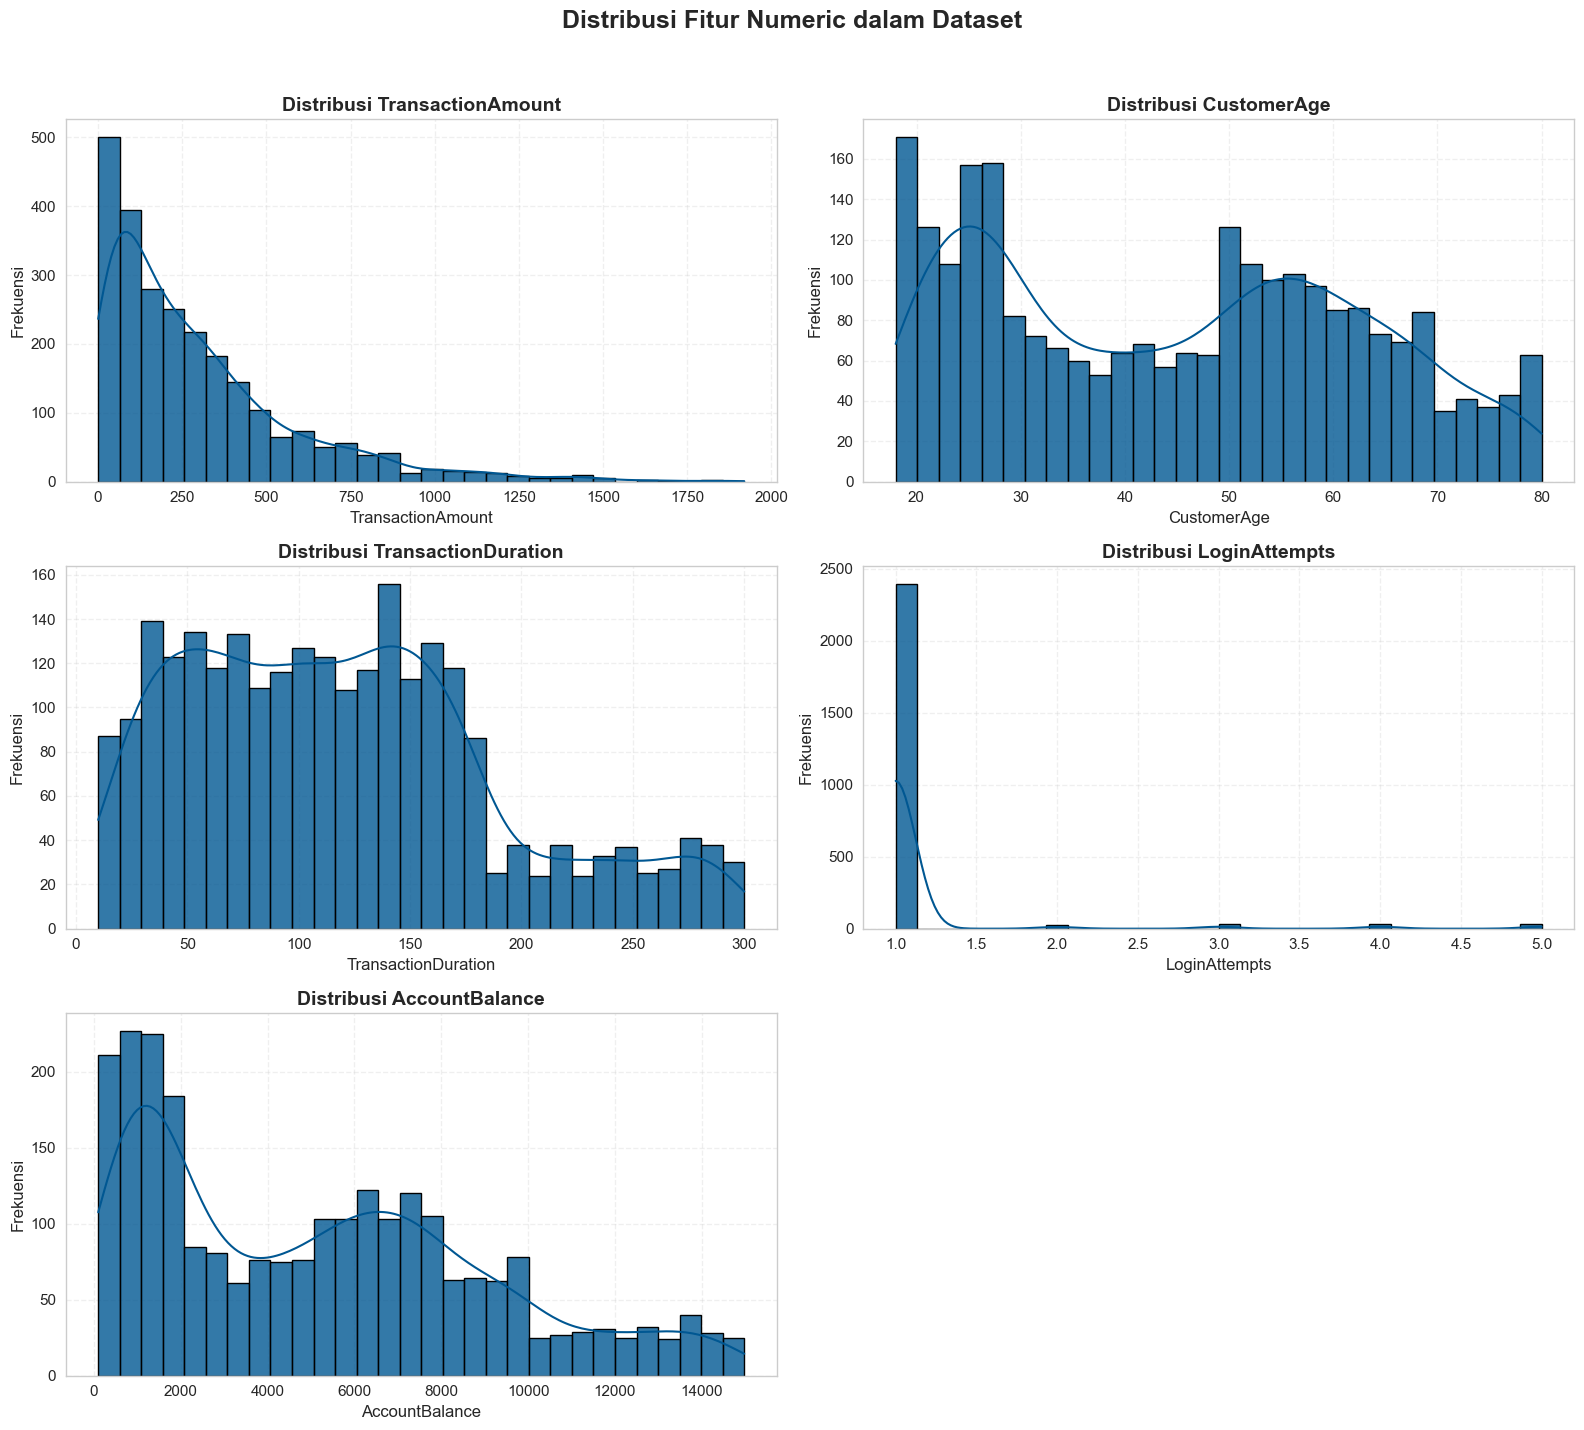

In [1448]:
# Setup figure terlebih dahulu
fig, ax = plt.subplots(3, 2, figsize=(16, 14))
ax = ax.flatten()
primary_color = '#005792'

# Membuat plot histogram setiap fitur
for i, col in enumerate(num_features):
    sns.histplot(df[col], ax=ax[i], color=primary_color, kde=True, bins=30, edgecolor='black', alpha=0.8)
    ax[i].set_title(f'Distribusi {col}', fontsize=14, fontweight='bold')
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Frekuensi', fontsize=12)
    ax[i].grid(True, linestyle='--', alpha=0.3)
    
# Menghpaus subplots yang sendirian 
fig.delaxes(ax[-1])

# Menampilkannya
plt.suptitle('Distribusi Fitur Numeric dalam Dataset', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Dari Visualisasi Histogram di atas kita bisa lihat bahwa setiap fitur ini condong ke kanan atau (right-skewed).

```
TransactionAmount
```
- Dari mulai **TransactionAmount** bisa kita lihat ini Fitur yang paling memiliki (right-skewed) yang cukup parah, yang mengindikasikan bawha transaksi terjadi kebanyakan pada nominal bawah, lebih banyak transaksi dengan nominal kecil ketimbang nominal yang sangat besar, dan itu wajar karena ya bukan hanya 10 nasabah, tapi 2000+ nasabah dan juga pasti ada kesenjangan sosial.
- Di buktikan dengan kebanyakan nilai terkumpul pada **500** kebawah, pada 750 ke bawah masih lumayan banyak tapi sudah mulai menyusut. Dan terakhir mungkin inimah pasti bakal di anggap outliers nih pasti udah fix yakin sekali di atas 1000 ke atas itu sangat jarang.

```
AccountBalance
```
- Yaps sama seperti **TransactionAmount** kita bisa lihat bahwa nilai nya sangat condong ke kanan atau (right-skewed) tapi tidak separah **TransactionAmount**. Nilai terkumpul di bawah 5000, yang mengindikasikan mayoritas nasabah memiliki Saldo yang di bawah 5000. Tapi ada juga yang memiliki 10.000+ ini gagah ya calon calon outliers inimah.

```
CustomerAge
```

- Disini kita bisa melihat bahwa distribusi data atau nilai dari **CustomerAge** ini cukup terdistribusi dengan baik, rata rata nya ada di umur 45 - 55 Tahun, terus semakin ke kanan mentok mentok sampai 80 Tahun. Ini bagus sih distribusinya jadi good game.



#### Membuat ScatterPlot untuk Bivariate Visualization

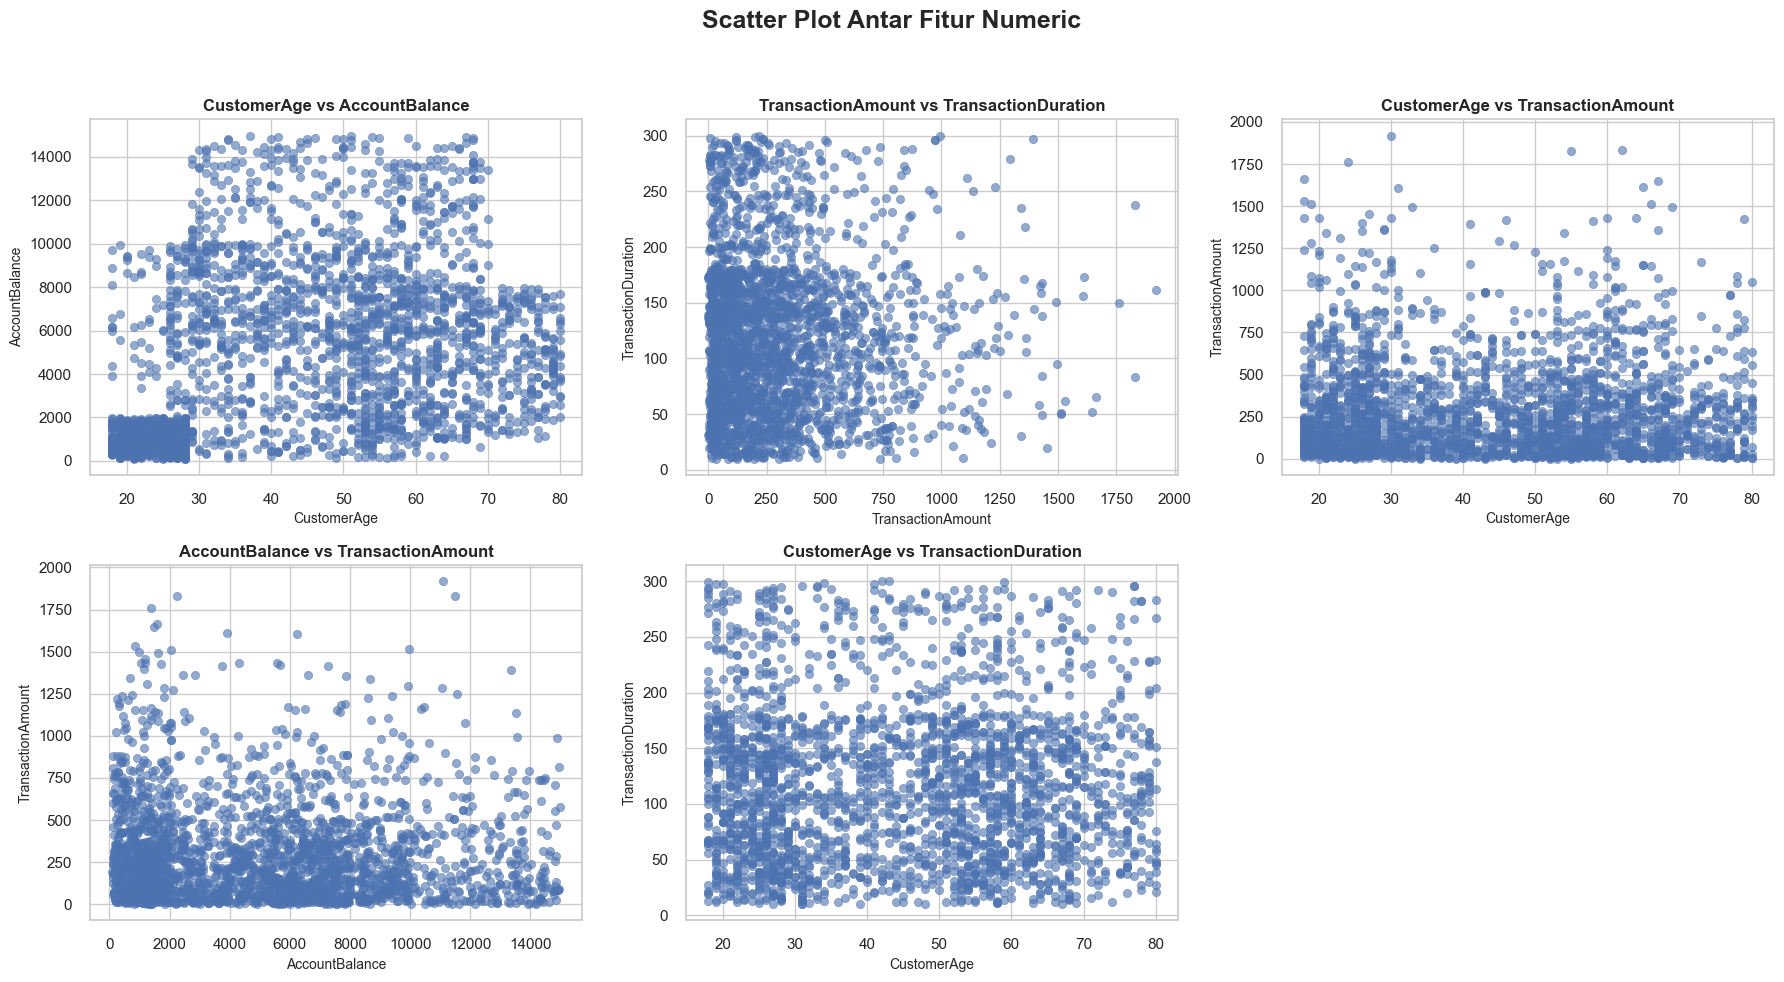

In [1449]:
# Membuat Visualisasi ScatterPlot
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Scatter Plot Antar Fitur Numeric', fontsize=18, fontweight='bold')

# List kombinasi yang akan kita pasangkan
pairs = [
    ('CustomerAge', 'AccountBalance'),
    ('TransactionAmount', 'TransactionDuration'),
    ('CustomerAge', 'TransactionAmount'),
    ('AccountBalance', 'TransactionAmount'),
    ('CustomerAge', 'TransactionDuration')
]

# Loop plot
for i, (x, y) in enumerate(pairs):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.scatterplot(data=df, x=x, y=y, ax=ax, alpha=0.6, edgecolor=None)
    ax.set_title(f'{x} vs {y}', fontsize=12, fontweight='bold')
    ax.set_xlabel(x, fontsize=10)
    ax.set_ylabel(y, fontsize=10)


if len(pairs) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Dari scatter plot ini aku bakall highlight hal hal yang menarik saja.

```
CustomerAge Vs AccountBalance
```
- Bisa kita lihat di **Scatterplot** **CustomerAge** Vs **AccountBalance** bahwa pada usia **20 - 28** Tahun terlihat penumpukan titik titik dot, yang mengindikasikan bahwa di masa early adulthood atau emerging adulthood, rata rata saldo yang merkea punya kebanyakan ada di **2.000** dolar, tapi tidak menutup kemungkinan bahwa di Usia tersebut juga memiliki saldo atau **AccountBalance** sebesar **4.000** dolar sampai **10.000** dolar, jika kita lihat pada **Scatterplot** nya.
- Hal menarik lainnya adalah ketika Usia di atas **30 - 70 Tahun** mulai tuh mereka punya saldo yang tinggi tinggi, dengan rentang saldo **0 - 15.000**. Jika kita lihat secara lebih detail pada usia **30 - 50 Tahun** kita bisa melihat bahwa titik titik dot lebih berkumpul kepada renatag saldo **6.000 - 4.500** dolar tapi masih ada yang saldonya di bawah itu dan di atas itu juga. Nah jika kita lihat lagi pada rentang Usia **50 - 70** Tahun, titik titik dotnya lebih bervariasi meskipun terpusat nya pada rentan saldo **100 - 8.000** dolar.
- Ini menunjukan bahwa semakin kita ada di Usia yang sudah bekerja maka semakin kita juga mempunyai **AccountBalance** yang relatif tinggi, tapi semakin tua kita semakin menyusust **AccountBalance** kita, bisa kita lihat pada Usia **70 - 80** Tahun yang hanya mentok mentok paling tinggi ada di **8.000** dolar.

```
CustomerAge Vs TransactionAmount
```

- Di temukan bahwa mayrotias nominal transaksi itu ada di **500** kebawah, entah usianya berapa tapi memang **500** ini bisa kita jadikan pembatas dan rata rata karena dalam visualisasi **Scatterplot** menunjukan hal serupa, tapi yang perlu di perhatikan disini rata rata Transaksi dengan nominal **1.000** itu tersebar luas di semua kelompok Usia, tapi yang paling membuat aku penasaran adalah kebanyakan transaksi dengan nominal di atas **1.250** ada di kelompok usia **20 - 30** Tahun, ini keren juga anak muda disana apakah berbisnis atau mungkin bapaknya yang suka minjem ATM anaknya nih.
- Terus pada rentang Usia **48 - 55** Tahun bisa kita lihat bahwa mereka gak terlalu implusif untuk bertransaksi secara nominal gede, mungkin mereka lebih safe money, atau berinvestasi buat masa tua, atau nabung di reksadana dan lain lainnya.

```
AccountBalance Vs TransactionAmount
```

- Kalau dari **Scatterplot** ini jujur aku tidak terlalu menemukan insight yang menarik, tapi yang bisa aku katakan adalah semakin tinggi **AccountBalance** seseorang maka semakin menyebar dan bervariasi juga Nominal Transaksi nya, meskipun ada saldo dengan reantang **0 - 2.000** dolar tapi sudah bertrankasi secara gede gedean, mungkin ini awal dia menggunakan jasa bank terkait.


```
Kesimpulan ScatterPlot
```
- Kalau kita lihat dari segi korelasi aku bakal menyimpulkan bahwa Secara keseluruhan, korelasi antar fitur numerik dalam dataset ini cenderung lemah hingga sedang. Fitur **AccountBalance** menunjukkan korelasi yang paling menarik dengan fitur lain, terutama dengan **CustomerAge** dan **TransactionAmount**. Sementara itu, CustomerAge dan TransactionDuration tampaknya tidak memiliki korelasi yang kuat dengan fitur lainnya.



### Melihat Korelasi Fitur Numeric

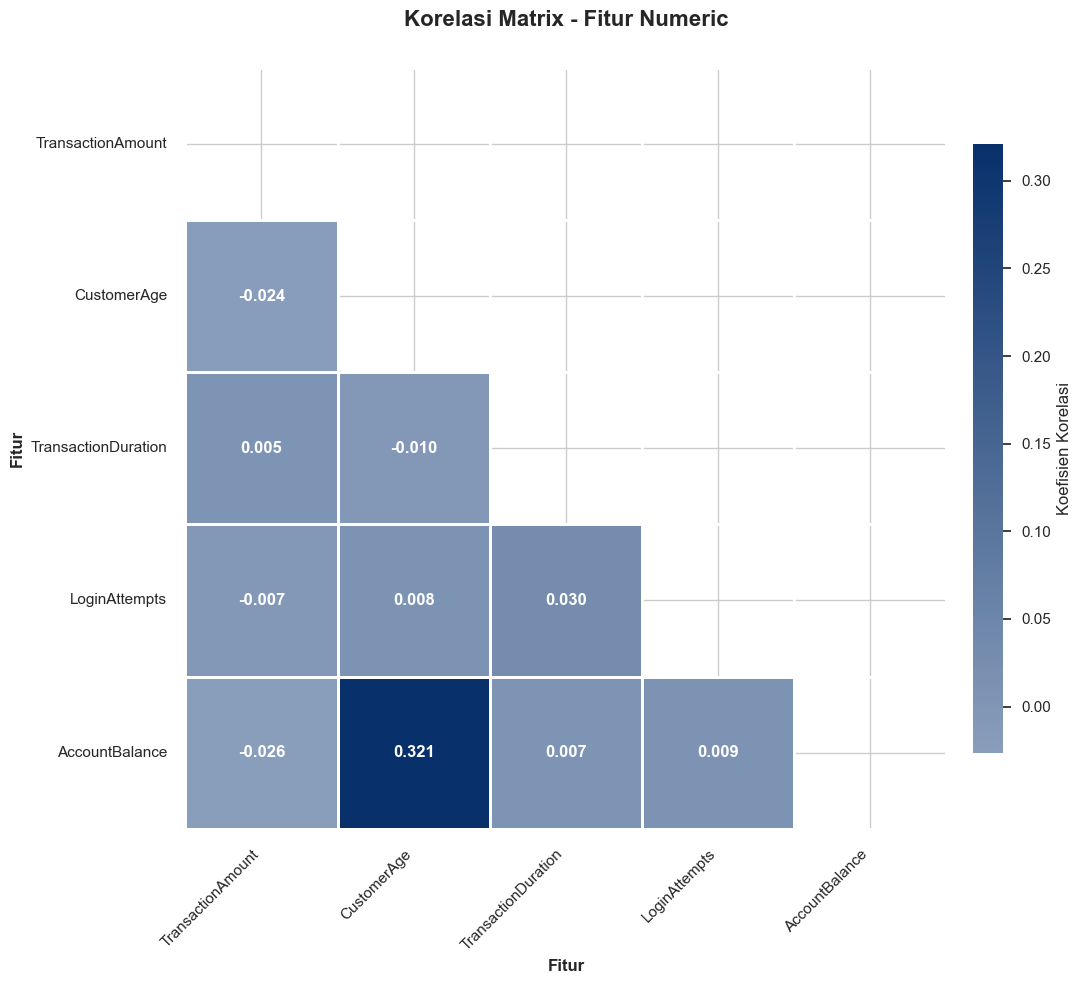

In [1450]:
# Setup Figure
fig, ax = plt.subplots(figsize=(14, 10))

# Menghitung korelasi
correlation_matrix = df[num_features].corr()

# Masking untuk menghilangkan bagian atas dari heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Custom warna untuk gaya gayaan dan estetika saja
custom_blues = sns.blend_palette(['#f7fbff', '#08306b'], as_cmap=True)

# Heatmap 
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt='.3f',
    cmap=custom_blues,
    center=0,
    square=True,
    linewidths=0.8,
    cbar_kws={
        "shrink": 0.8,
        "label": "Koefisien Korelasi",
        "orientation": "vertical",
        "pad": 0.02
    },
    annot_kws={
        'size': 12,
        'weight': 'bold'
    }
)

# Styling 
ax.set_title('Korelasi Matrix - Fitur Numeric', fontsize=16, fontweight='bold', pad=30)
ax.set_xlabel('Fitur', fontsize=12, fontweight='bold')
ax.set_ylabel('Fitur', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Menambahkan Border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

plt.tight_layout()
plt.show()

- Bisa kita lihat pada Visualisasi **Heatmap** di atas tidak ada korelasi yang lebih dari 0.5 loh, berarti menunjukan bahwa setiap fitur numerik ini sangat lemah banget korelasinya, tapi ada yang cukup baiklah yaitu Fitur **CustomerAge** dan juga **AccountBalance** dengan korelasi di angka **0.33**.
- Kesimpulannya kita tidak perlu takut akan **MULTICOLINEARITY** karena tidak ada korelasi antar Fitur yang berkorelasi tinggi.

### Visualisasi Informatif Fitur Numeric

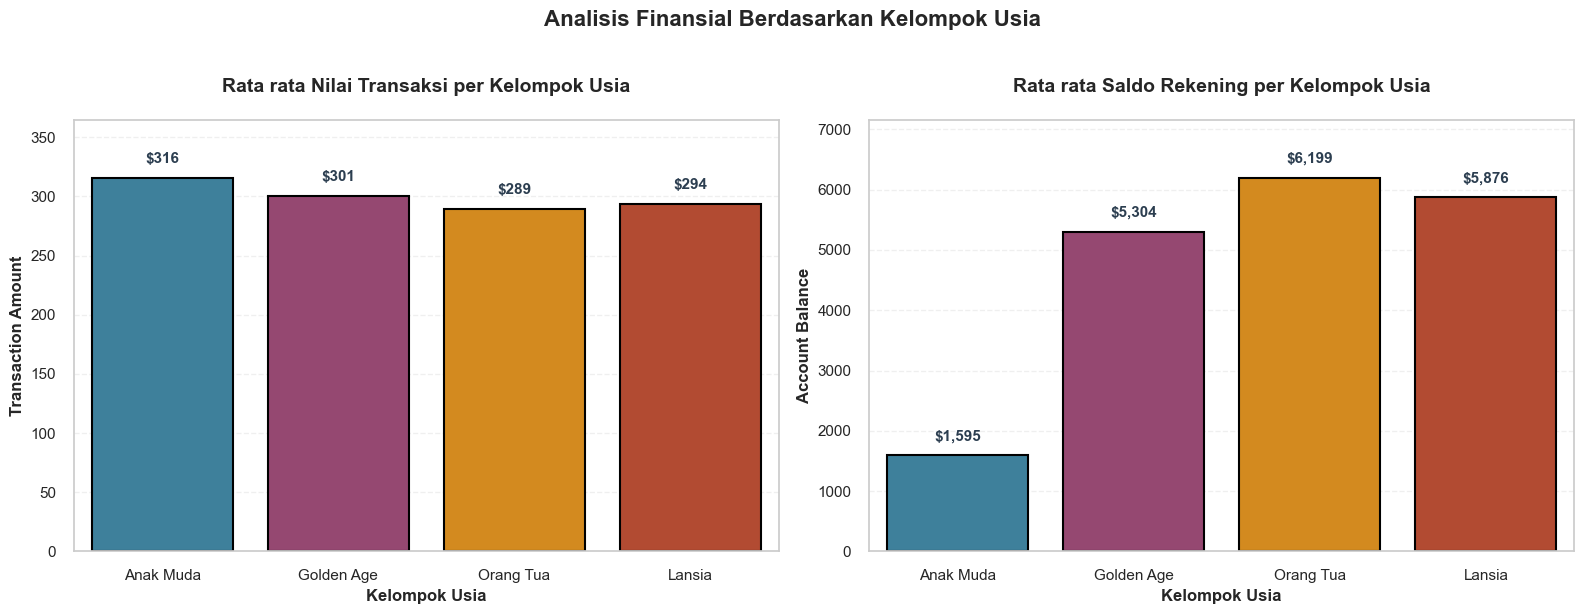

KEY INSIGHTS
Kelompok Usia dengan transaksi tertinggi: Anak Muda
Kelompok Usia dengan saldo tertinggi: Orang Tua


In [1451]:
# Copy DataFrame karena akan melakukan binning
df_binning = df.copy()

# Melakukan binning pada fitur 'CustomerAge'
bins_age = [18, 25, 45, 65, 80]
labels_age = ['Anak Muda', 'Golden Age', 'Orang Tua', 'Lansia']

df_binning['AgeGroup'] = pd.cut(df_binning['CustomerAge'], bins=bins_age, labels=labels_age, right=False, include_lowest=True)
df_binning['AgeGroup'] = pd.Categorical(df_binning['AgeGroup'], categories=labels_age, ordered=True)

# Membuat Visualisasi Bar Chart
fig, ax = plt.subplots(1, 2, figsize=(16, 6), facecolor='white')  

# Color palette yang lebih vibrant
blue_palette = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# AgeGroup vs TransactionAmount
sns.barplot(
    data=df_binning,
    x='AgeGroup',
    y='TransactionAmount',
    hue='AgeGroup',
    ax=ax[0],
    errorbar=None,
    edgecolor='Black', 
    linewidth=1.5,
    palette=blue_palette,
    legend=False
)

# Improved annotations
for i, bar in enumerate(ax[0].patches):
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2., height + 10,
               f'${height:,.0f}',  
               ha='center', va='bottom',
               fontsize=11, fontweight='bold', color='#2C3E50')

ax[0].set_title('Rata rata Nilai Transaksi per Kelompok Usia', fontsize=14, fontweight='bold', pad=20)
ax[0].set_xlabel('Kelompok Usia', fontsize=12, fontweight='600')
ax[0].set_ylabel('Transaction Amount', fontsize=12, fontweight='600')
ax[0].grid(True, linestyle='--', alpha=0.3, axis='y')
ax[0].set_ylim(0, ax[0].get_ylim()[1] * 1.1)  

# AgeGroup vs AccountBalance
sns.barplot(
    data=df_binning,
    x='AgeGroup',
    y='AccountBalance',
    hue='AgeGroup',
    ax=ax[1],
    errorbar=None,
    edgecolor='Black',
    linewidth=1.5,
    palette=blue_palette,
    legend=False
)

for i, bar in enumerate(ax[1].patches):
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2., height + 200,
               f'${height:,.0f}',  
               ha='center', va='bottom',
               fontsize=11, fontweight='bold', color='#2C3E50')

ax[1].set_title('Rata rata Saldo Rekening per Kelompok Usia', fontsize=14, fontweight='bold', pad=20)
ax[1].set_xlabel('Kelompok Usia', fontsize=12, fontweight='600')
ax[1].set_ylabel('Account Balance', fontsize=12, fontweight='600')
ax[1].grid(True, linestyle='--', alpha=0.3, axis='y')
ax[1].set_ylim(0, ax[1].get_ylim()[1] * 1.1)

# Judul dan penataan 
plt.suptitle('Analisis Finansial Berdasarkan Kelompok Usia',fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Insight nya 
print('KEY INSIGHTS')
print(f'Kelompok Usia dengan transaksi tertinggi: {df_binning.groupby("AgeGroup", observed=False)["TransactionAmount"].mean().idxmax()}')
print(f'Kelompok Usia dengan saldo tertinggi: {df_binning.groupby("AgeGroup", observed=False)["AccountBalance"].mean().idxmax()}')

Dari visualisasi `Clustered Bar Chart` yang aku lakukan di temukan bahwa.

```
Kelompok Usia 18 - 25 Tahun (Anak Muda)
```
- Kelompok Usia 18 - 25 Tahun atau bisa di bilang **Generasi Muda** seperti aku sering banget transaksi tapi saldo nya kaga ada hehehe, bisa kita lihat dari visualisasi di atas memang terbukti kelompok Usia 18 - 25 (Generasi Muda)  banyak yang bertransaksi dengan nominal yang tertinggi dengan kalangan usia lain tapi paling sedikit banget saldo dengan kisaran saldo ada di **1.595** dolar.
- Di buktikan juga dengan adanya Key Insights yang aku buat untuk pembuktian saja, kelompok usia yang sering transaksi itu ya anak muda haha.

```
Kelompok Usia 26 - 45 Tahun (Muda)
```
- Kelompok Usia **Golden Age** ini paling kece juga dari segi Transaksi maupun Saldo nya Transaksi nya yang cukup pasif dengan selisih yang lumayan ketat pada setiap kelompoknya, tapi memiliki Saldo yang lumayan besar yang jauh dari **Generasi Muda** dengan nilai saldo ada di **\$5.304** . Yang memang jika kita lihat realitanya bahwa di Usia **GoldenAge** ini memang lagi masa masanya semangat bekerja kalau menurut bapa sayamah, mengejar mimpi yang harus di capai, dan sering nabung buat masa depan atau membeli mobil yang di inginkan. Jadi ya wajar jika Saldo nya gede gede karena di usia segitu rajin dan sering handle side hustle untuk mencapai impian financial freedom. Makanya oleh aku di sebut **GoldenAge**
- Di Buktikan di Key Insights juga Kelompok Usia **Orang Tua** itu yang paling tinggi saldonya.

```
Kelompok Usia 46 - 60 Tahun (Orang Tua)
```
- Sepertinya Visualisasi Transaksi itu kurang mencakup keseluruhan nilai sehingga kurang representatif untuk di jadikan acuan untuk sekarang. Maka dari itu jika di lihat pada Visualisasi di axes ke 2, **Orang Tua** memiliki Saldo yang paling besar, dan ini adalah fakta, pada Usia **Orang Tua** ini kebanyakan ayah menabung untuk perencanaan ke depan, seperti anak sekolah, jajan istri, skincare istri, dan takutnya anak nendang pintu minta aerog wkwk. Karena bapak saya juga seperti itu katanya sekarang mah semuanya demi keluarga. Terus mengapa saldonya besar, karena jerih payah semasa **Golden Age** dan juga semasa dia menjadi orang tua.

```
Kelompok Usia 61+ Tahun ke atas (Kakek Kakek)
```
- Pada Usia **Kakek Kakek** Saldo mulai sedikit menurun, karena mungkin mereka sekarang hanya ingin menikmati hidup, tidak punya ambisi seperti pas semangat semangat nya kerja lagi, sudah seharusnya menikmati masa masa tua melihat anak dan cucu. Dan mungkin mengurang tuh gara gara ngasih ke cucu sih haha.




## Visualisasi Untuk Fitur Kategorikal

### Membuat Countplot Untuk Visualisasi Univariate

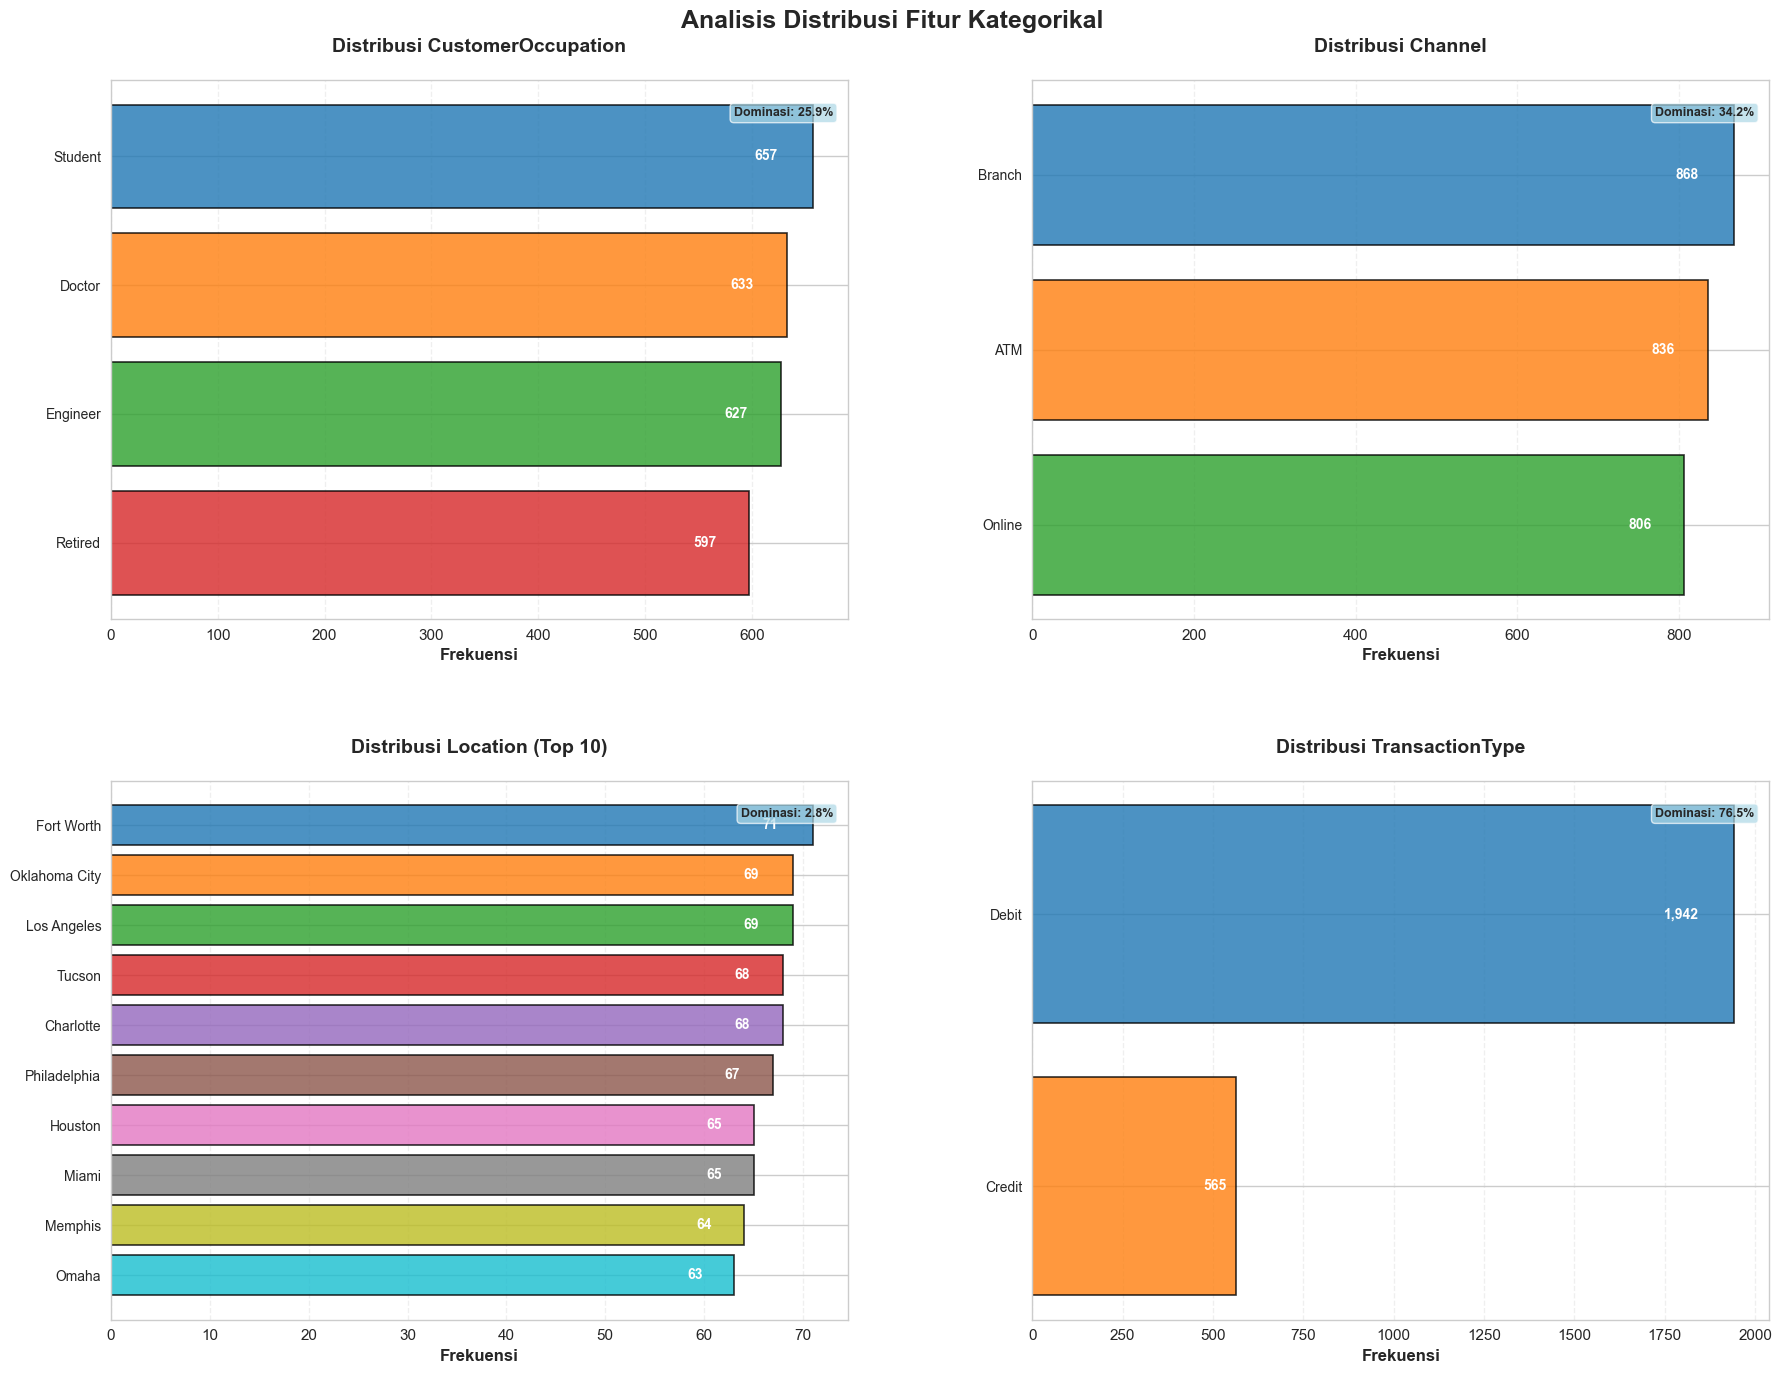

KEY INSIGHTS:

CustomerOccupation:
Total kategori: 5
Kategori dominan: Student (657 - 25.9%)
Channel:
Total kategori: 4
Kategori dominan: Branch (868 - 34.2%)
Location:
Total kategori: 44
Kategori dominan: Fort Worth (71 - 2.8%)
TransactionType:
Total kategori: 3
Kategori dominan: Debit (1,942 - 76.5%)


In [1452]:
# Memilih fitur yang Bermanfaat saja 
cat_selected = ['CustomerOccupation', 'Channel', 'Location', 'TransactionType']

# Setup figure
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(18, 14), facecolor='white')
ax = ax.flatten()

# Warna yang akan di gunakan
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Menyimpan data untuk insight kedalam dictionary
insights = {}

# Loop untuk setiap fitur
for i, col in enumerate(cat_selected):
    # Filter top 10 untuk Location, sisanya tampilkan semua
    if col == 'Location':
        top_values = df_binning[col].value_counts().nlargest(10)
        plot_data = top_values
        title_suffix = " (Top 10)"
    else:
        plot_data = df_binning[col].value_counts()
        title_suffix = ""
    
    # Ini dia 
    insights[col] = {
        'total_categories': len(df_binning[col].unique()),
        'top_category': plot_data.index[0],
        'top_count': plot_data.iloc[0],
        'percentage': (plot_data.iloc[0] / len(df_binning)) * 100
    }
    
    # Horizontal bar chart
    bars = ax[i].barh(
        range(len(plot_data)), 
        plot_data.values,
        color=colors[:len(plot_data)],
        edgecolor='black',
        linewidth=1.2,
        alpha=0.8
    )
    
    # Kustom Plot
    ax[i].set_yticks(range(len(plot_data)))
    ax[i].set_yticklabels(plot_data.index, fontsize=10)
    ax[i].set_xlabel('Frekuensi', fontsize=12, fontweight='600')
    ax[i].set_title(f'Distribusi {col}{title_suffix}', fontsize=14, fontweight='bold', pad=20)
    
    # Annotasi untuk setiap bar chart
    for j, (bar, value) in enumerate(zip(bars, plot_data.values)):
        width = bar.get_width()
        if width > max(plot_data.values) * 0.1:  
            x_pos = width - (width * 0.05)
            ha = 'right'
            color = 'white'
            weight = 'bold'
        else:
            x_pos = width + (max(plot_data.values) * 0.01)
            ha = 'left'
            color = 'black'
            weight = 'normal'
        
        ax[i].text(x_pos, bar.get_y() + bar.get_height()/2, 
                   f'{int(value):,}', 
                   ha=ha, va='center', 
                   fontsize=10, fontweight=weight, color=color)
    
    # Dominasi Setiap Kategorikal
    top_pct = (plot_data.iloc[0] / len(df_binning)) * 100
    ax[i].text(0.98, 0.95, f'Dominasi: {top_pct:.1f}%', 
               transform=ax[i].transAxes, 
               ha='right', va='top',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7),
               fontsize=9, fontweight='bold')
    
    ax[i].grid(True, linestyle='--', alpha=0.3, axis='x')
    ax[i].set_axisbelow(True)
    ax[i].invert_yaxis()


plt.suptitle('Analisis Distribusi Fitur Kategorikal', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.3, wspace=0.25)
plt.show()

# Biasa Ke Insight
print('KEY INSIGHTS:\n')
for feature, data in insights.items():
    print(f'{feature}:')
    print(f'Total kategori: {data["total_categories"]}')
    print(f'Kategori dominan: {data["top_category"]} ({data["top_count"]:,} - {data["percentage"]:.1f}%)')

Jika kita lihat pada Visualisasi Countplot dan juga Key Insights, maka aku mendapatkan insight.

```
CustomerOccupation (Jabatan/Pekerjaan)
```
- Dari Fitur **CustomerOccupation** bisa di lihat bahwa di dominasi oleh nasabah bank adalah orang orang yang terpelajar (Mahasiswa) dengan persentase yang gak terlalu imbalance data hanya 26%. Dan yang paling penting adalah gak ada tuh orang yang pengangguran, jadi bisa di simpulkan Saldo yang tinggi tinggi itu kemungkinan memang asli, karena nasabahnya saja orang orang yang berpendidikan. Terus distribusinya saja sangat merata karena terlihat bahwa distribusi frequensi nya saja hanya muncul dengan selisih yang cukup kecil.

```
Channel (Saluran Transaksi/Media Transaksi)
```
- Ini dari **Media Transaksi** ini mengejutkan sih karena masih banyak orang yang pergi ke bank dan cabang cabang nya loh dengan persentase 34%, mengingat sekarang itu sangat jarang yang datang ke bank langsung, tapi aku gak tau sih dataset ini diterbitkan kapan mungkin ini diterbitkan sudah lama deh. Terus kalau misalkan memang ini benar benar dataset yang diterbitkan pada 3-5 Tahun ke belakang aku peraya yang ke bank itu pasti kakek kakek dan nenek nenek, atau orang tua, cuma ini dari Transactiondate nya saja ini berada pada 2024 loh. karena kalau ATM ya masih banyak di gunakan memang kalau di zaman sekarang apalagi oleh ibu ibu. Tapi kalau misalkan cabang kayanya hm gimana ya.
- Tapi kemungkinan memang disana seperti itu deh.

```
Location (Lokasi)
```
- Nah kalau **Lokasi** ini tidak ada yang dominan walaupun memiliki nilai unik yang palng banyak yaitu berjumlah 42, tapi distribusi dan cakupan banknya sangat baik di semua lohasi, ini berarti memang sangat luas dan sangat bagus, tidak ada satu pun yang mendominasi.

```
TransactionType (Jenis Transaksi)
```
- Kalau ini **Jenis Transaksi** di dominasi banget oleh **Debit** dengan persentase 76.5%, ini memberikan sinyal yang kuat bahwa mayoritas orang gak suka ngutang, sukanya langsung bayar gak usah pake paylatter latteran, dominasi **Debit** ada di angka **1.942**, meninggalkan banget **Credit** yang berbeda jauh banget selisihnya yang hanya memiliki angka di **565**.





### Bivariate Visualization

In [1453]:
# Melakukan Binning agar lebih mudah dalam proses visualisasi ini

# Untuk Fitur AccountBalance
labels_ab = ['Low', 'Medium', 'High', 'Very High']
df_binning['AccountBalanceGroup'] = pd.qcut(df_binning['AccountBalance'], q=4, labels=labels_ab)
df_binning['AccountBalanceGroup'] = pd.Categorical(df_binning['AccountBalanceGroup'], categories=labels_ab, ordered=True)

# Untuk Fitur TransactionAmount
labels_ta = ['Low', 'Medium', 'High', 'Very High']
df_binning['TransactionAmountGroup'] = pd.qcut(df_binning['TransactionAmount'], q=4, labels=labels_ta)
df_binning['TransactionAmountGroup'] = pd.Categorical(df_binning['TransactionAmountGroup'], categories=labels_ta, ordered=True)


In [1454]:
def visualisasi_heatmap_keypoints(main_feature, compare_feature, df):
    """
    Fungsi ini ditujukan untuk membuat visualisasi heatmap dan juga memberikan insight key point yang niatnya biar mempermudah dan tidak memperbanyak kata kata di insight yang akan aku berikan nantinya.
    """
    # Setup figure dengan spacing yang optimal
    fig, axes = plt.subplots(2, 2, figsize=(20, 16), facecolor='white')
    axes = axes.flatten()
    
    # Warna biru muda yang cerah dan nyaman untuk mata
    light_blue_palette = sns.color_palette([
        '#E3F2FD',
        '#BBDEFB',
        '#90CAF9',
        '#64B5F6',
        '#42A5F5',
        '#2196F3',
        '#1E88E5',
        '#1976D2'
    ], as_cmap=True)
    
    insights = {}
    
    for i, compare_feature in enumerate(compare_feature):
        if i >= 4:
            break
        
        # Handle berbagai jenis fitur dengan cara yang tepat
        if compare_feature == 'Location':
            # Ambil top 6 lokasi untuk menghindari clutter
            top_locations = df[compare_feature].value_counts().head(6).index.tolist()
            plot_data = df[df[compare_feature].isin(top_locations)].copy()
            subtitle = " (Top 6 Lokasi)"
        elif compare_feature == 'LoginAttempts':
            # Handle NaN values
            plot_data = df.dropna(subset=[compare_feature]).copy()
            # Convert ke categorical untuk tampilan yang lebih baik
            plot_data['LoginAttempts_Cat'] = plot_data['LoginAttempts'].astype(int).astype(str) + ' percobaan'
            compare_feature_name = 'LoginAttempts_Cat'
            subtitle = ""
        else:
            # Untuk fitur lainnya
            plot_data = df.copy()
            compare_feature_name = compare_feature
            subtitle = ""
        
        # Set nama feature yang akan digunakan
        if compare_feature != 'LoginAttempts':
            compare_feature_name = compare_feature
        
        # Buat tabel proporsi cross-tabulation
        prop_table = pd.crosstab(
            plot_data[main_feature],
            plot_data[compare_feature_name],
            normalize='index'
        ) * 100
        
        # Buat heatmap yang informatif
        sns.heatmap(
            prop_table,
            annot=True,
            fmt='.1f',
            cmap=light_blue_palette,
            ax=axes[i],
            linewidths=1.5,
            linecolor='white',
            square=False,
            cbar_kws={
                'shrink': 0.8, 
                'aspect': 25, 
                'label': 'Persentase (%)',
                'pad': 0.02
            },
            annot_kws={
                'fontsize': 10, 
                'color': 'Black'
            }
        )
        
        # Styling judul dengan spacing yang tepat
        clean_compare = compare_feature.replace('_Cat', '').replace('Customer', '')
        title_text = f'Analisis {main_feature} vs {clean_compare}{subtitle}'
        axes[i].set_title(
            title_text, 
            fontsize=13, 
            fontweight='bold', 
            pad=25,  
            color='Black'
        )
        
        # Label sumbu yang jelas dengan spacing
        axes[i].set_xlabel(clean_compare, fontsize=11, fontweight='600', labelpad=10)
        axes[i].set_ylabel(main_feature, fontsize=11, fontweight='600', labelpad=10)
        
        # Rotasi label untuk readability
        axes[i].tick_params(axis='x', rotation=45, labelsize=9, pad=5)
        axes[i].tick_params(axis='y', rotation=0, labelsize=9, pad=5)
        
        # Test statistik Chi-square untuk validasi hubungan
        try:
            count_table = pd.crosstab(plot_data[main_feature], plot_data[compare_feature_name])
            chi2, p_value, dof, expected = chi2_contingency(count_table)
            significance = 'Signifikan' if p_value < 0.05 else 'Tidak Signifikan'
        except Exception as e:
            significance = 'Error'
            p_value = 1.0
        
        # Badge untuk signifikansi statistik
        axes[i].text(
            0.02, 0.95, 
            f'Chi-square: {significance}', 
            transform=axes[i].transAxes, 
            fontsize=8, 
            fontweight='bold',
            bbox=dict(
                boxstyle='round,pad=0.4', 
                facecolor='Black', 
                alpha=0.9, 
                edgecolor='white',
                linewidth=1.2
            ),
            verticalalignment='top', 
            color='white'
        )
        
        # Simpan insights untuk analisis
        if not prop_table.empty:
            max_combo = prop_table.stack().idxmax()
            max_value = prop_table.stack().max()
            insights[clean_compare] = {
                'pola_terkuat': f"{max_combo[0]} --> {max_combo[1]}",
                'persentase': f"{max_value:.1f}%",
                'signifikansi': significance,
                'p_value': p_value
            }
    
    # Sembunyikan subplot yang tidak terpakai
    for j in range(len(compare_feature), 4):
        axes[j].set_visible(False)
    
    # Judul utama dengan spacing yang tepat
    fig.suptitle(
        f'Analisis {main_feature}\nHeatmap Proporsi dengan Insights Statistik', 
        fontsize=16, 
        fontweight='bold', 
        y=0.96,  
        color='Black'
    )
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.89, hspace=0.35, wspace=0.3)  # Increased spacing
    plt.show()
    
    # Output insights yang mudah dipahami
    print(f'Key Insight {main_feature}')
    print('=' * 50)
    
    for feature, data in insights.items():
        print(f'\n{main_feature} vs {feature}:\n')
        print(f'Pola terkuat yang ditemukan adalah: {data["pola_terkuat"]} ({data["persentase"]})')
        print(f'Hubungan Statistik terkuat yang ditemukan adalah: {data["signifikansi"]} (p={data["p_value"]:.4f})')
    
    return insights

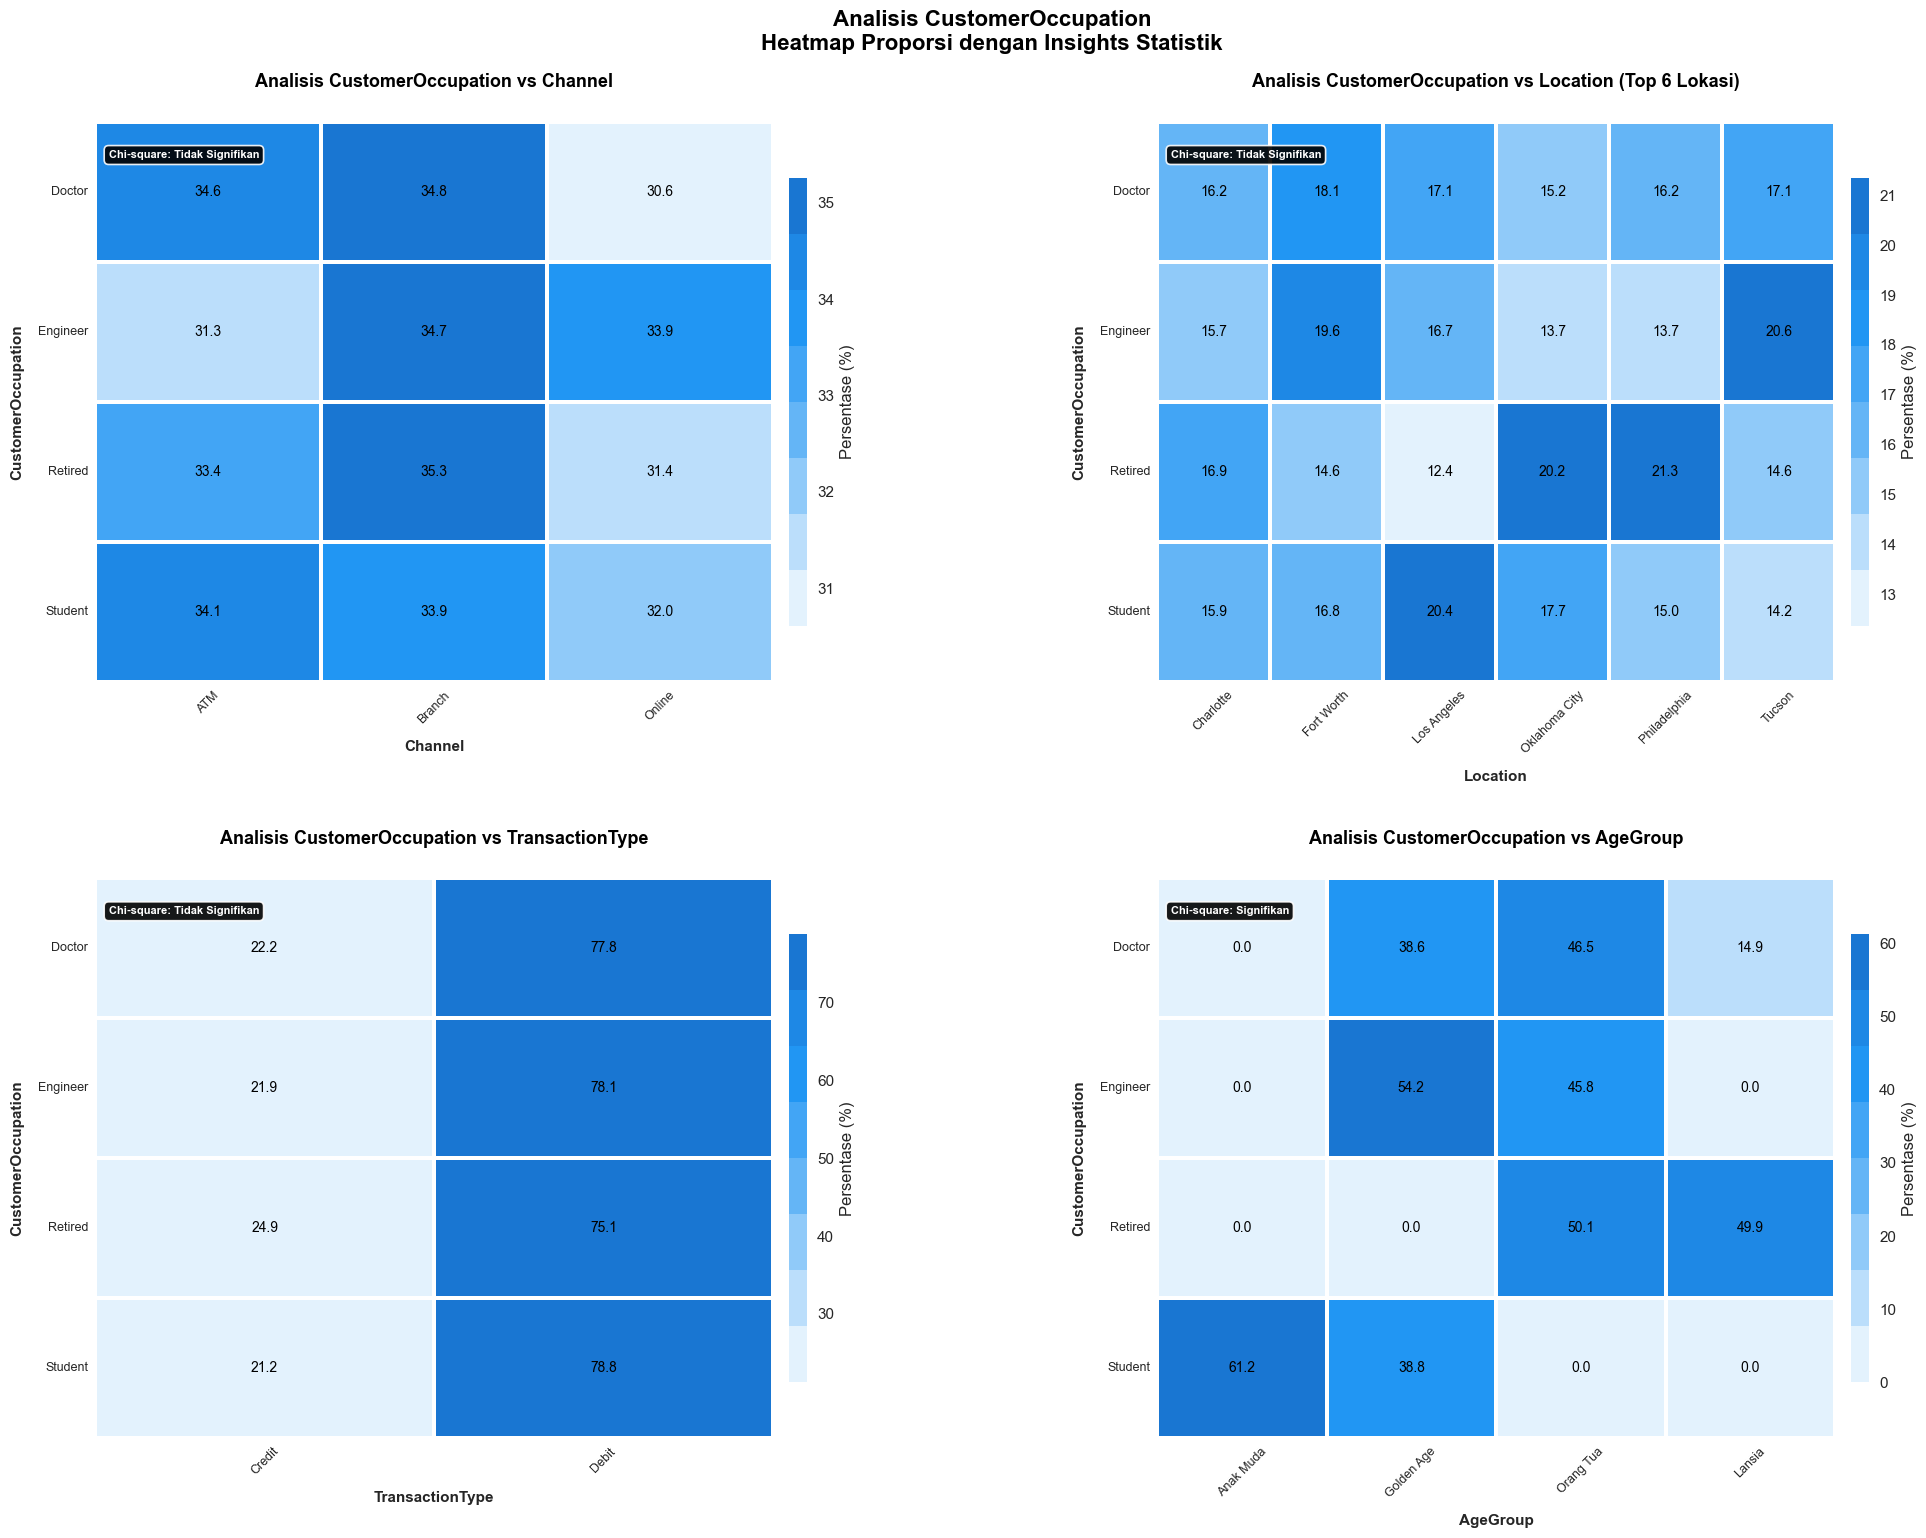

Key Insight CustomerOccupation

CustomerOccupation vs Channel:

Pola terkuat yang ditemukan adalah: Retired --> Branch (35.3%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.8697)

CustomerOccupation vs Location:

Pola terkuat yang ditemukan adalah: Retired --> Philadelphia (21.3%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.9388)

CustomerOccupation vs TransactionType:

Pola terkuat yang ditemukan adalah: Student --> Debit (78.8%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.4272)

CustomerOccupation vs AgeGroup:

Pola terkuat yang ditemukan adalah: Student --> Anak Muda (61.2%)
Hubungan Statistik terkuat yang ditemukan adalah: Signifikan (p=0.0000)


In [1455]:
# Menerapkan fungsi kepada customer occupation
customerOccupation = visualisasi_heatmap_keypoints(
    main_feature='CustomerOccupation',
    compare_feature=['Channel', 'Location', 'TransactionType', 'AgeGroup'],
    df=df_binning
)

```
CustomerOccupation Vs Channel
```
- Doktor sering sekali menggunakan ATM dan datang ke cabang, kalau enginner sering datang ke cabang dan juga sering lewat online, Pensiunan lebih ke ATM dan juga datang ke cabang, nah kalau untuk student atau mahasiswa dia lebih general semuanya bisa, anak muda lah ya. Tapi yang perlu di perhatikan disini semuanya memilih datang ke cabang kalau yang kerja emang gak aneh sih, tapi kalau mahasiswa mungkin bikin daftar kartu ATM kali ya.

```
CustomerOccupation Vs Location
```
- Mahasiswa lebih sedikit dominan di LA, kalau pensiunan lebih dominan di 2 wilayah saja yaitu Oklahoma City dan juga Philadelpia, kalau engineer sama di 2 kota yaitu di Fort Worth dan juga Tuscan, nah kalau dokter lebih general sama seperti Mahasiswa.

```
CustomerOccupation VS TransactionType
```
- Kalau ini semuanyas sepakat menggunakan Debit sih walaupun pasti ada saja di semua pekerjaan yang ngutang juga, tapi sedikit lah ya mungkin buat ada urgensi banget dan gak ada dana talang nya.

```
CustomerOccupation Vs AgeGroup
```
- Kombinasi ini yang paling keren dengan di buktikan oleh Hubungan Statistik yang Signigikan. 
- Bisa kita lihat saja Ini keren banget sih gak ada Usia anak muda yang pensiun begitupun sebaliknya semuanya sangat simetris banget, disini yang perlu di perhatikan adalah Golden Age dia keren sih ada yang sudah jadi dokter, ada yang kerja jadi engineer dan ada juga yang menempuh jenjang pendidikan yang lebih tinggi seperti mencapai master, tapi kebanyakan nya di engineer juga sih. 
- Hal menarik juga terjadi di lansia dia itu dokter yang belum lengser lengser keren sih kek, bisanya dokter specialis ini yang udah lansia nih. Terus malah orang tua yang cenderung pensiun daripada lansia walaupun beda sedikit

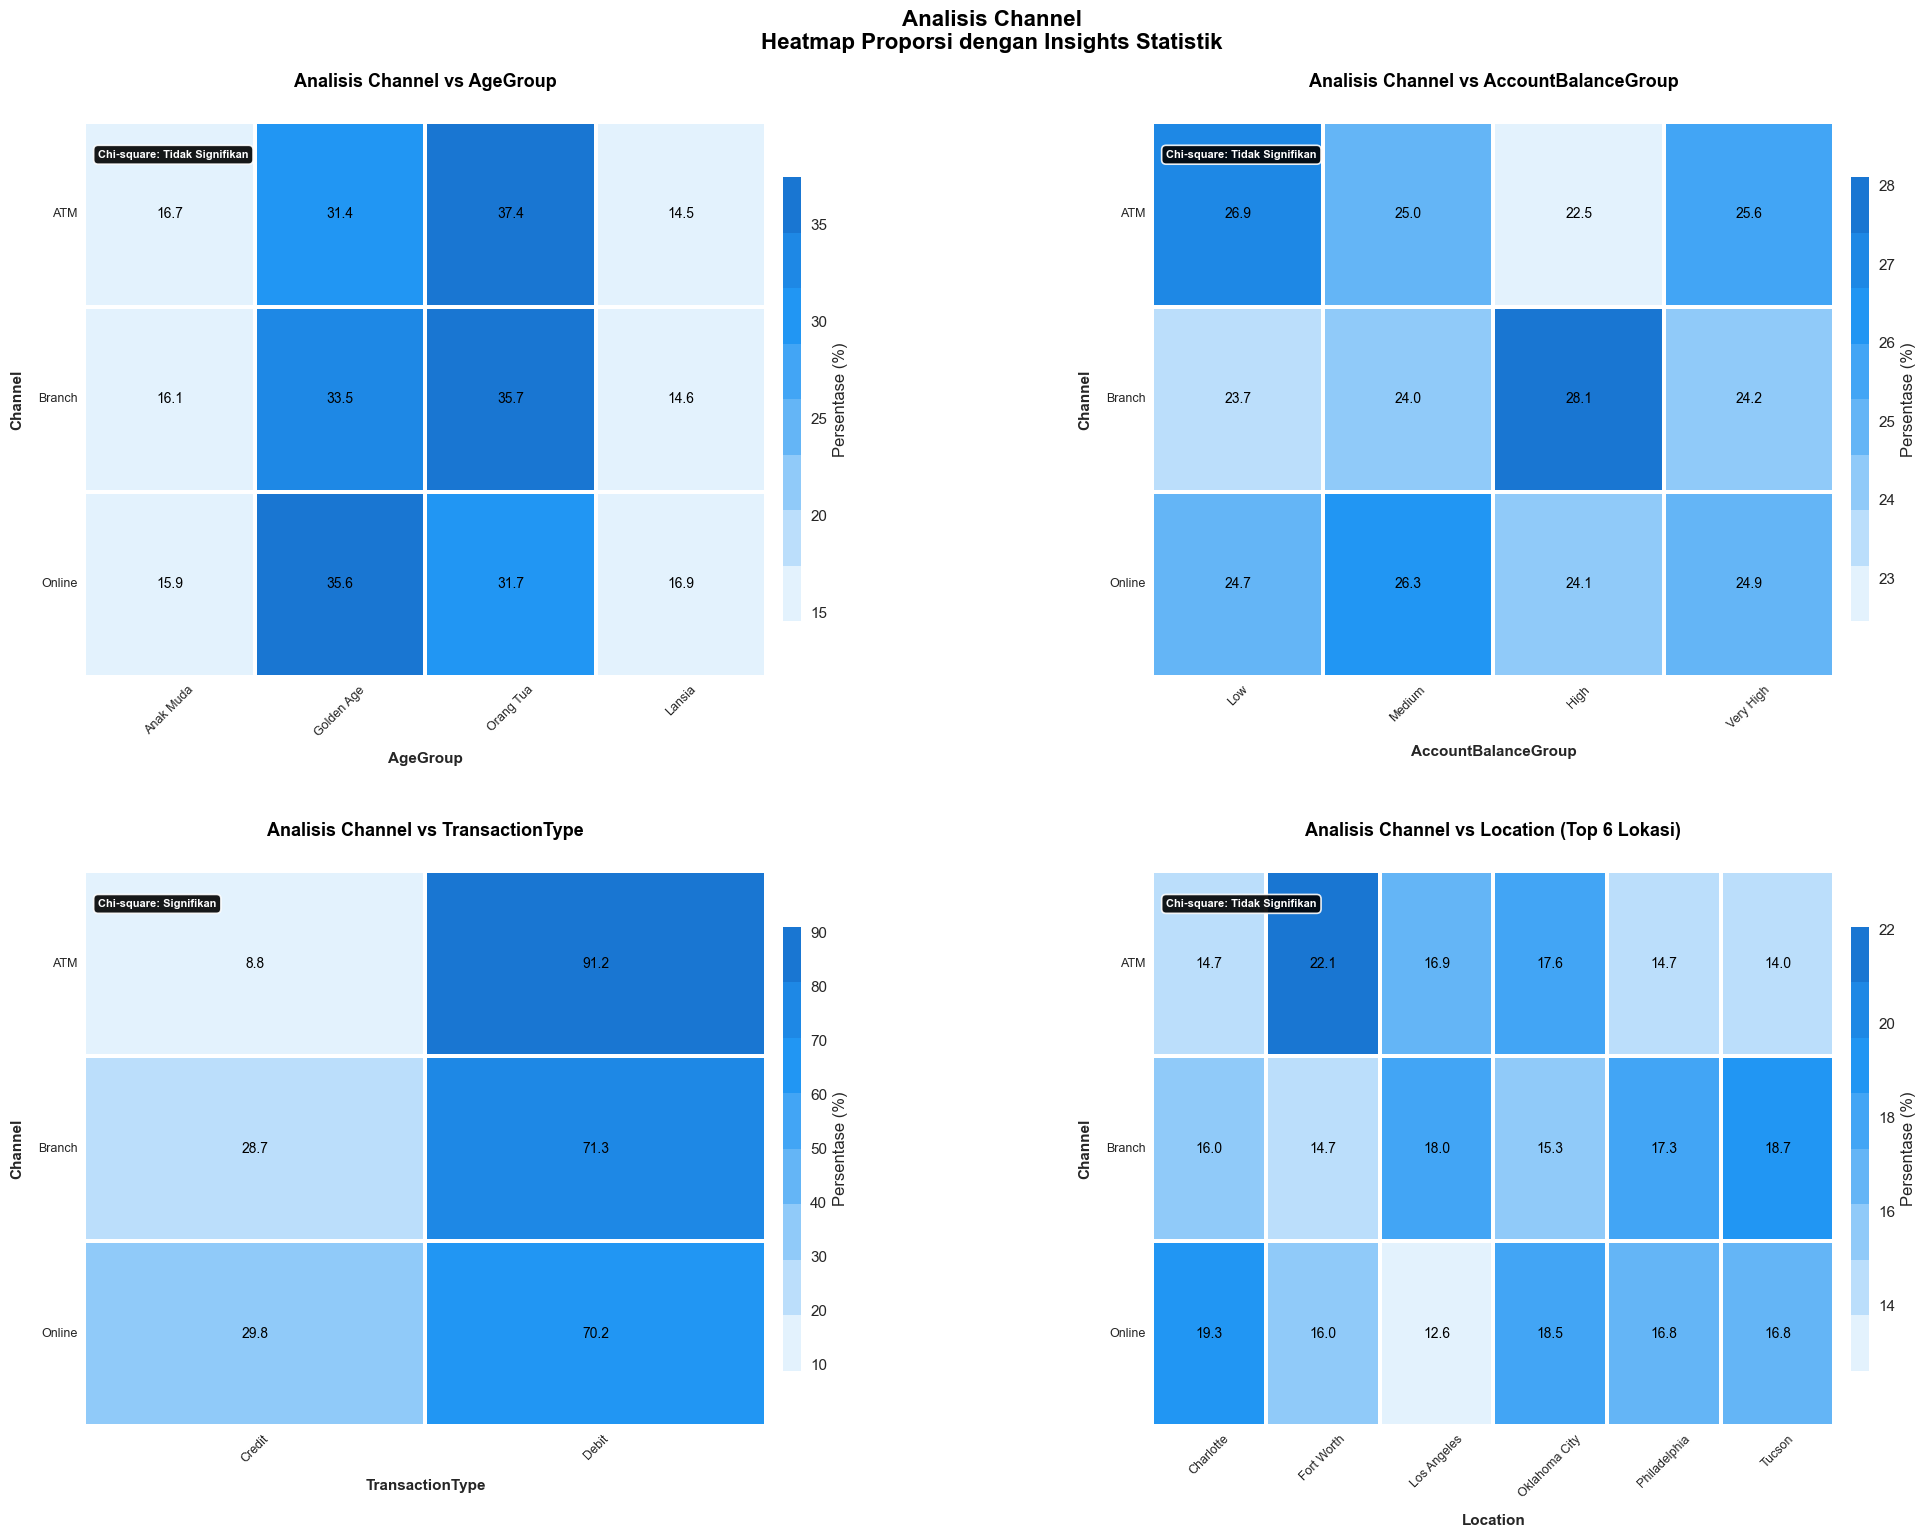

Key Insight Channel

Channel vs AgeGroup:

Pola terkuat yang ditemukan adalah: ATM --> Orang Tua (37.4%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.2182)

Channel vs AccountBalanceGroup:

Pola terkuat yang ditemukan adalah: Branch --> High (28.1%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.1840)

Channel vs TransactionType:

Pola terkuat yang ditemukan adalah: ATM --> Debit (91.2%)
Hubungan Statistik terkuat yang ditemukan adalah: Signifikan (p=0.0000)

Channel vs Location:

Pola terkuat yang ditemukan adalah: ATM --> Fort Worth (22.1%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.7861)


In [1456]:
# Channel
channel = visualisasi_heatmap_keypoints(
    main_feature='Channel',
    compare_feature=['AgeGroup', 'AccountBalanceGroup', 'TransactionType', 'Location'],
    df=df_binning
)

```
Channel Vs AgeGroup
```
- Ini juga keren sih bisa di lihat yang paling aktif banget menggunakan media transaksi itu adalah Golden Age dan juga Orang tua, Anak muda jarang sekali mungkin kebanyakan anak muda ada di bawah 17 Tahun, tapi kalau yang lansia ya itu wajar mereka hanya ingin menikmati hidup bukan lagi memikirkan uang, kalau bertransaksi juga paling buat cucunya fix itumah.

```
Channel Vs AccountBalanceGroup
```
- Disini bisa kita lihat juga bawha ATM tuh bener bener banyak di pake di saldo apapun kecuali saldo High dia lumayan sedikit, sering banget di pake oleh saldo yang rendah, kalau datang ke cabang sering kali di lakukan oleh para nasabah yang memiliki saldo High, ya wajar lah ya ini orang tua dan juga lansia terus juga mungkin mereka memanfaatkan benefit sebagai nasbah premium, kalau Online Semuanya juga pakai intinya.

```
Channel Vs TransactionType
```
- Ini dia kita menemukan lagi Hubungan Statistik yang sangat kuat.
- Ya iyalah masa gak mempunyai hubungan erat media transaksi sama tipe transaksi nya.

```
Channel Vs Location
```
- ATM sering kali muncul di Wilayah Fort Woth dan bisa di buktikan dengan penggunaan media transaksi lain di Wilayah Fort Worth tersebut, terus kalau yang lain nya ya rata rata ada lah ya apalagi Cabang dan juga Online apalagi itumah pasti ada dimana mana.

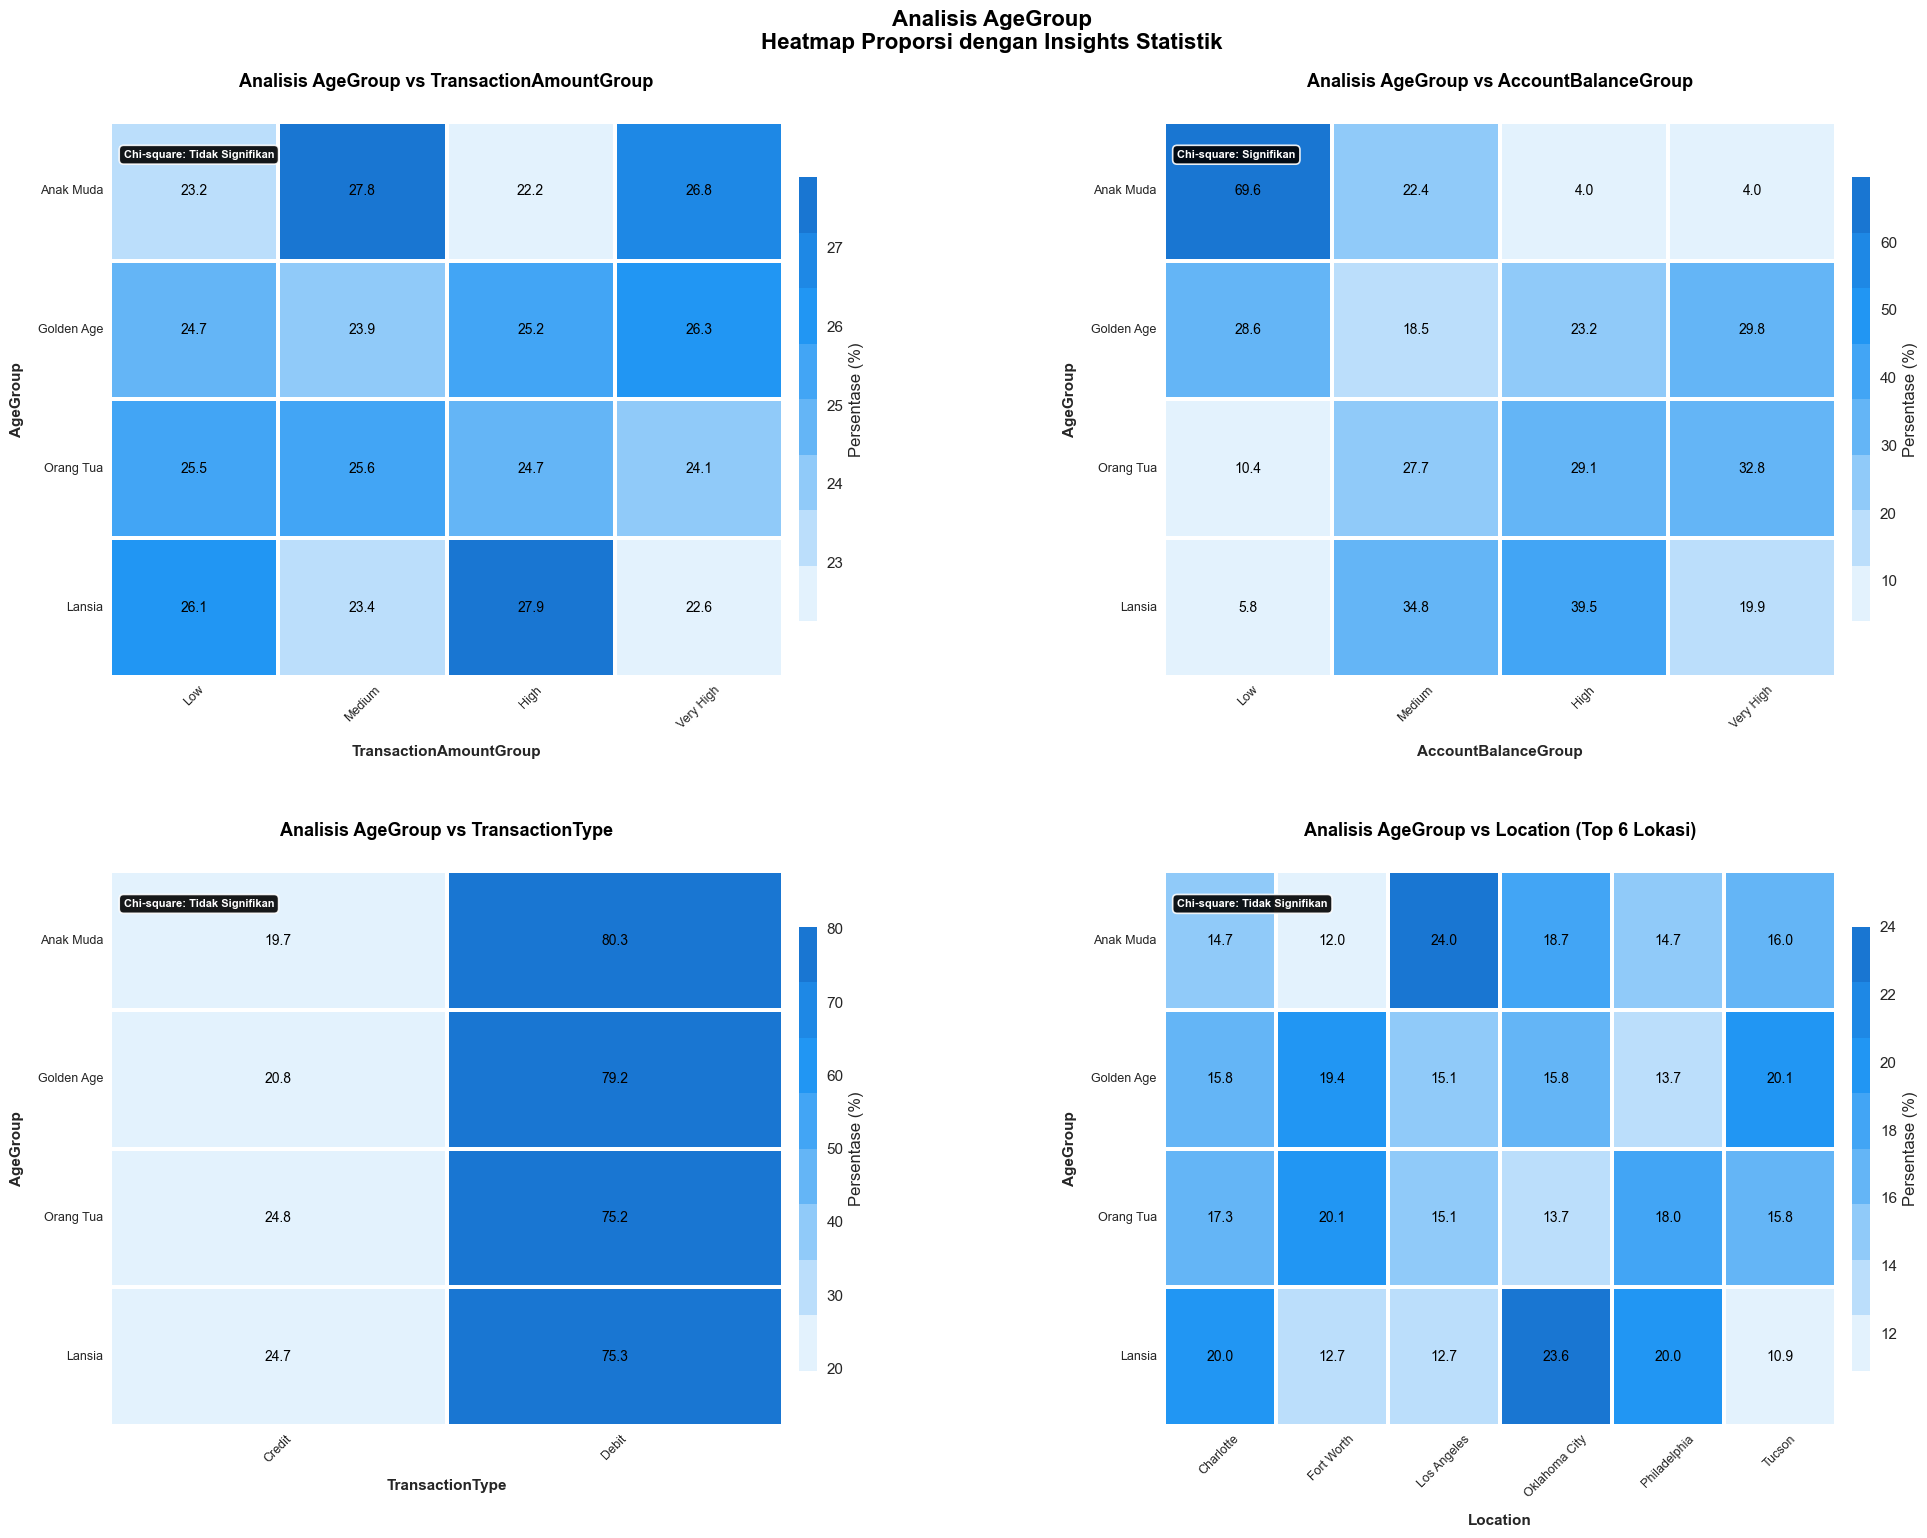

Key Insight AgeGroup

AgeGroup vs TransactionAmountGroup:

Pola terkuat yang ditemukan adalah: Lansia --> High (27.9%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.5754)

AgeGroup vs AccountBalanceGroup:

Pola terkuat yang ditemukan adalah: Anak Muda --> Low (69.6%)
Hubungan Statistik terkuat yang ditemukan adalah: Signifikan (p=0.0000)

AgeGroup vs TransactionType:

Pola terkuat yang ditemukan adalah: Anak Muda --> Debit (80.3%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.0745)

AgeGroup vs Location:

Pola terkuat yang ditemukan adalah: Anak Muda --> Los Angeles (24.0%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.5961)


In [1457]:
# AgeGroup
ageGroup = visualisasi_heatmap_keypoints(
    main_feature='AgeGroup',
    compare_feature=['TransactionAmountGroup', 'AccountBalanceGroup', 'TransactionType', 'Location'],
    df=df_binning
)

```
AgeGroup Vs TransactionAmoutGroup
```
- Walawe ini anak muda walawe hobby nya ngabisin uang aja, nominal transaksi nya rata rata ada di medium dan parahnya dia sering banget high spending, ini keknya buat sepatu dan gaya gayaan ini kaya aku. Terus jika kita lihat Golden Age dan Orang Tua cenderung memiliki rata rata nominal transaksi yang sama di semua Kelompok Nominal Transaksi, yang paling penting adalah ini lansia Nominal Transaksi nya cukup tinggi inimah fix kan buat cucunya seperti yang sudah aku bilang tadi.

```
AgeGroup Vs AccountBalanceGroup
```
- Phew ini dia kita menemukan lagi Hubungan Statistik yang Signifikan lagi antara kelompok usia dan juga kelompok saldo.
- Nah kan liat anak muda udah mah saldonya paling sedikit ini gimana ini udah mah mahasiswa tapi tadi nominal transaksi nya yang paling tinggi, tapi jangan salah ada juga kok mahasiswa yang saldonya medium, entah dia kerja jadi barista, entah dia berbisnis dan lain lain lah pokonya, cuma yang paling aku saluti adalah ada anak muda yang mencapai saldo cukup tinggi dan sangat tinggi 4% lagi Clap to The King inimah.
- Nah di Golden Age juga ternyata banyak yang low loh walaupun hanya 20% ini mungkin yang masih kulaih S2 atau S3, terus yang lainnya ya rata lah semuanya ada yang kaya dan sangat kaya juga ini membuktikan tadi pekerjaan engineer dan juga dokter tadi. Terus kalau di lihat orang tua juga sama seperti Golden Age yang membedakannya adalah sangat jarang sekali ada yang saldo nya rendah, walaupun pasti ada.
- Nah kalau Lansia Ini ada di 2 dominasi saja yaitu saldo standard dan juga saldo yang cukup banyak.

```
AgeGroup Vs Location
```
- Jika di lihat Anak Muda kebanyakan ada di wilayah LA dan juga Oklahoma City yang paling sedikit ada di FortWorth di buktikan dengan kebanyakan usia Golden Age dan juga orang tua disana, Terus kalau Golden Age dan juga Orang Tua lebih merata meskipun ada juga yang jarang sih, tapi kalau lansia ini di dominasi oleh 3 wilayah, Charlotte, Oklahoma City dan Philadelpia. 

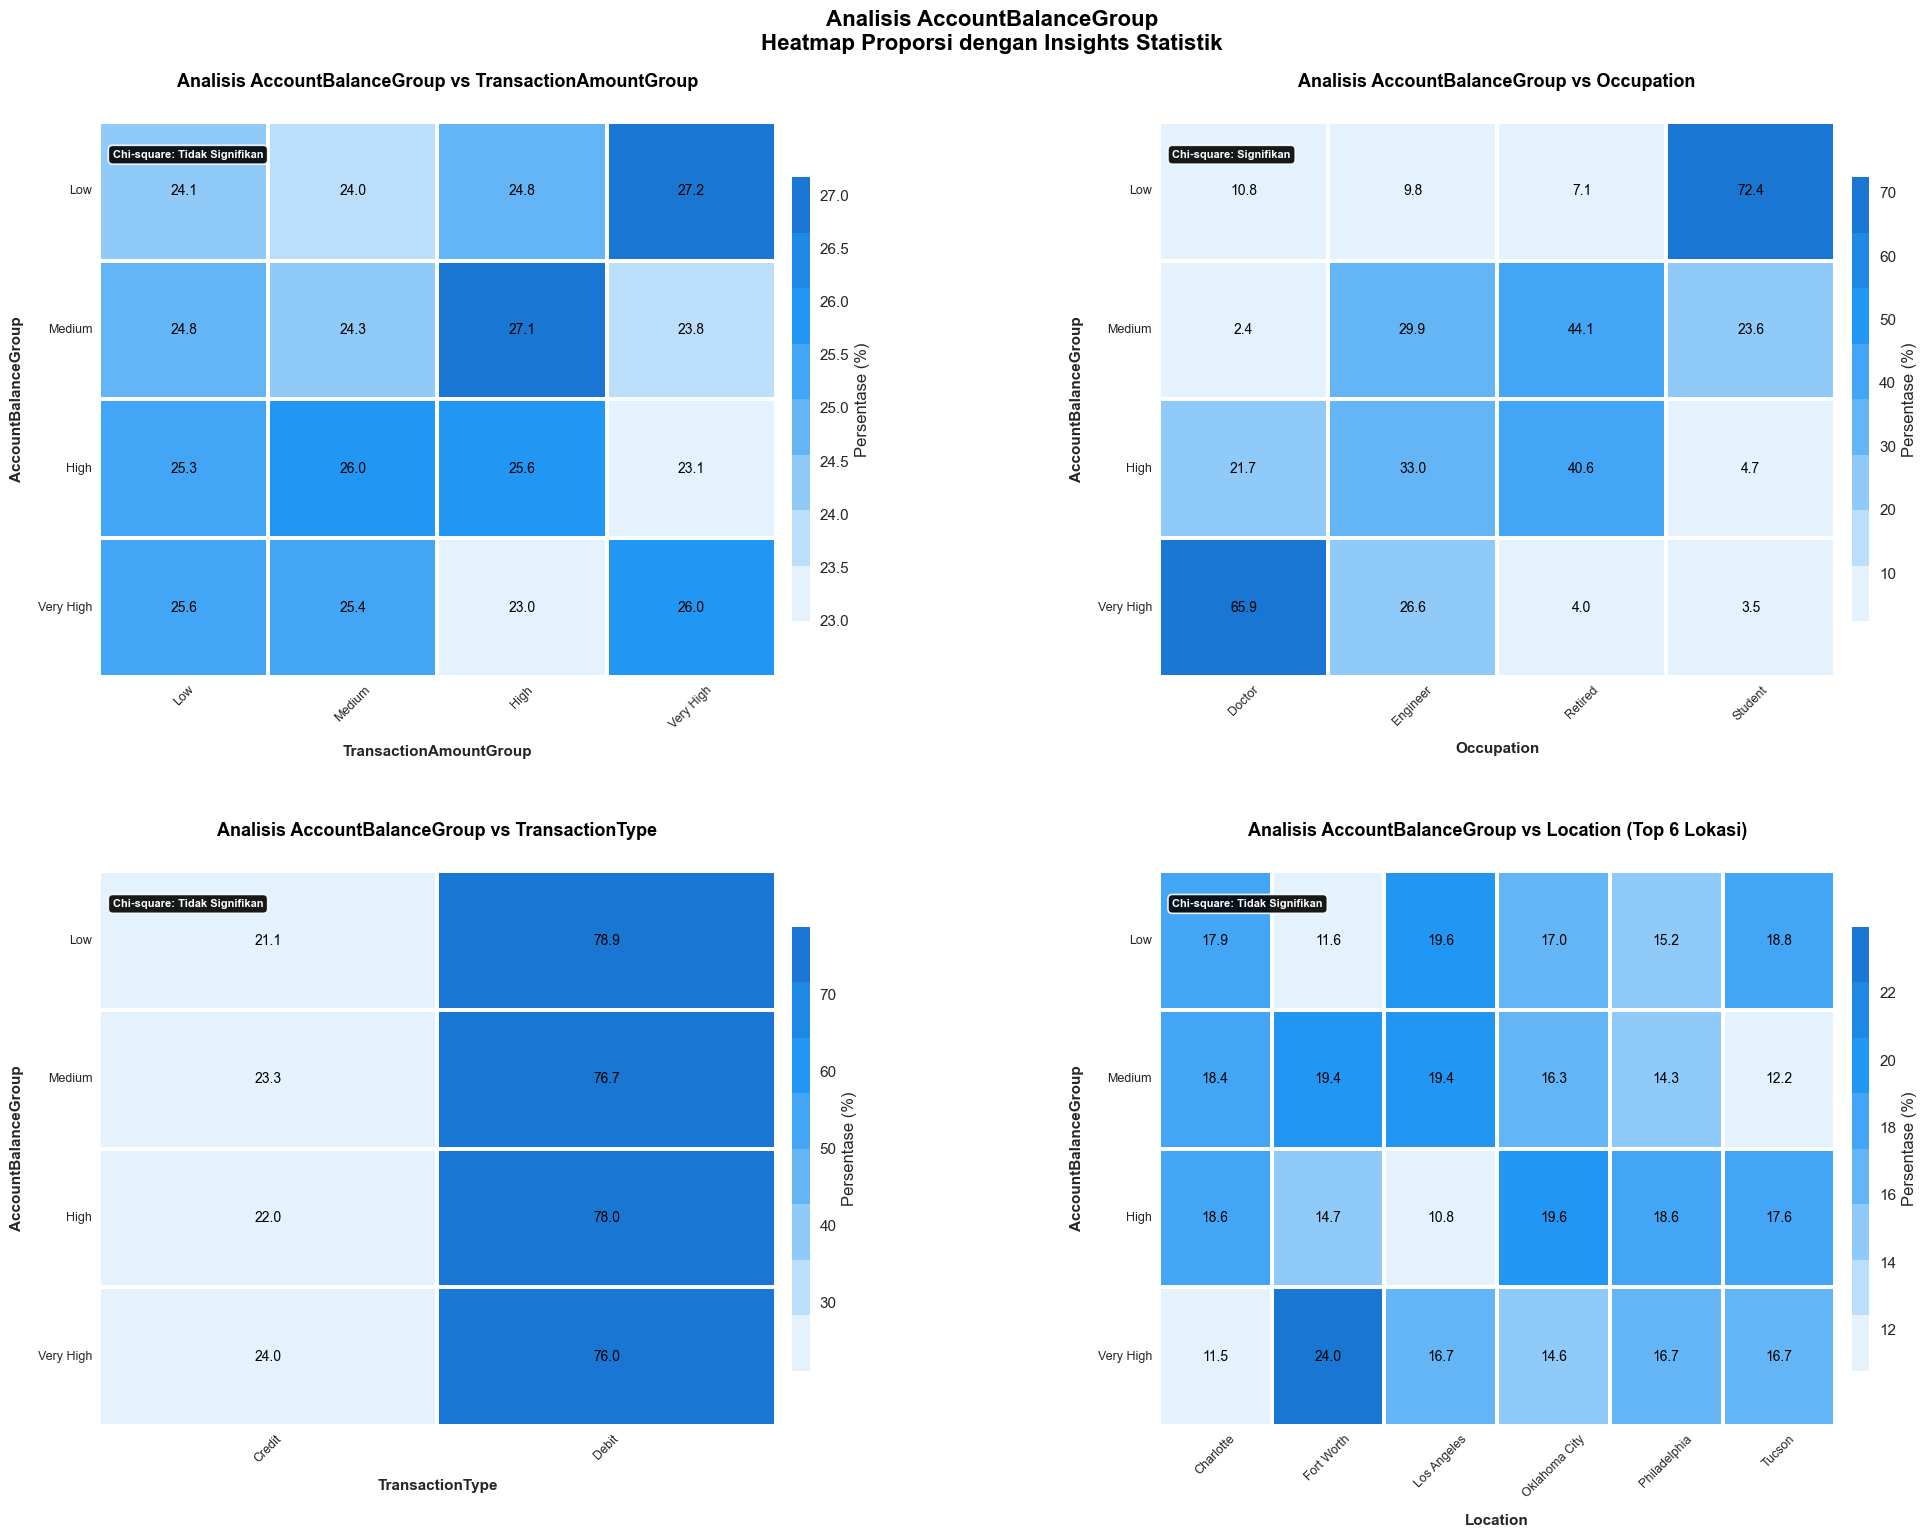

Key Insight AccountBalanceGroup

AccountBalanceGroup vs TransactionAmountGroup:

Pola terkuat yang ditemukan adalah: Low --> Very High (27.2%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.7581)

AccountBalanceGroup vs Occupation:

Pola terkuat yang ditemukan adalah: Low --> Student (72.4%)
Hubungan Statistik terkuat yang ditemukan adalah: Signifikan (p=0.0000)

AccountBalanceGroup vs TransactionType:

Pola terkuat yang ditemukan adalah: Low --> Debit (78.9%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.6334)

AccountBalanceGroup vs Location:

Pola terkuat yang ditemukan adalah: Very High --> Fort Worth (24.0%)
Hubungan Statistik terkuat yang ditemukan adalah: Tidak Signifikan (p=0.5711)


In [1458]:
# AccountBalanceGroup
accountBalanceGroup = visualisasi_heatmap_keypoints(
    main_feature='AccountBalanceGroup',
    compare_feature=['TransactionAmountGroup', 'CustomerOccupation', 'TransactionType', 'Location'],
    df=df_binning
)

```
AccountBalanceGroup Vs TransactionAmountGroup
```
- Nah ini mahasiswa dan anak muda nih saldo sedikit tapi dia sangat sering bertransaksi dengan nominal yang sangat tinggi, terus kalau di saldo yang medium ini sering kali dia juga bertransaksi dengan nominal yang cukup tinggi, kalau golden age dan juga mahasiswa bisa di terima lah ya, karena masih mencari dan haus validasi dari orang lain.
- Ini yang menarik nih lihat saldo yang cukup tinggi merata di semuanya ada yang low spending, medium spending dan juga high spending tapi jarag banget dia melakukan very high transaction, kebalikannya juga yang saldonya sangat banyak dia jarang banget tuh bertransaksi dengan nominal yang cukup tinggi, jelegur jelegur ajalah ya.

```
AccountBalanceGroup Vs CustomerOccupation
```
- Ini dia kita menemukan lagi Hubungan Statistik yang ada pada fitur kelompok saldo dan juga pekerjaan.
- Student sangat sangat di dominasi oleh saldo kering, kalo saldo yang medium banyak nya ada di semua pekerjaan kecuali dokter sangat sedikit dan juga di mahasiswa, tapi sangat di dominasi oleh yang pensiunan. Terus kalau melihat saldo yang cukup banyak itu udah mulai gak ada dan sedikit banget mahasiswa nyatuh dokter udah lumayan sedikit ada dan juga engineer juga sudah makin ada, tapi yang paling the best sih ini, saldo yang sangat banyak di pegang oleh dokter inimah udah gak usah di jelaskan lagi kan?. Tapi ada engineer juga ini fix sih aku di masa depan amin.

```
AccountBalanceGroup Vs Location
```
- Untuk Saldo kering semuanya ada di wilayah manapun kecuali di wilayah Fort Worth, why?, nanti aku jelaskan, LA tuh ada kan banyak anak muda soalnya. Terus kalau Saldo Standard ada semuanya ada kecuali di Tuscan sangat jarang kebanyakannya di Charlotte, LA, dan Fort Worth, terus yang Saldonya cukup tinggi ada semua wilayah kecuali di Fort Worth dan juga di LA, ini kenapa ya yang saldonya cukup banyak dan juga yang saldonya banyak sekali entah dari nominal transaksi sekarang di wilayah sama sama jauh jauhan.
- Untuk Saldo yang sangat banyak itu ada di Fort Worth inilah alasannya kenapa Cukup sedikit saldo kering disana.

### Membuat Visualisasi PieChart untuk Melihat Proporsi Data

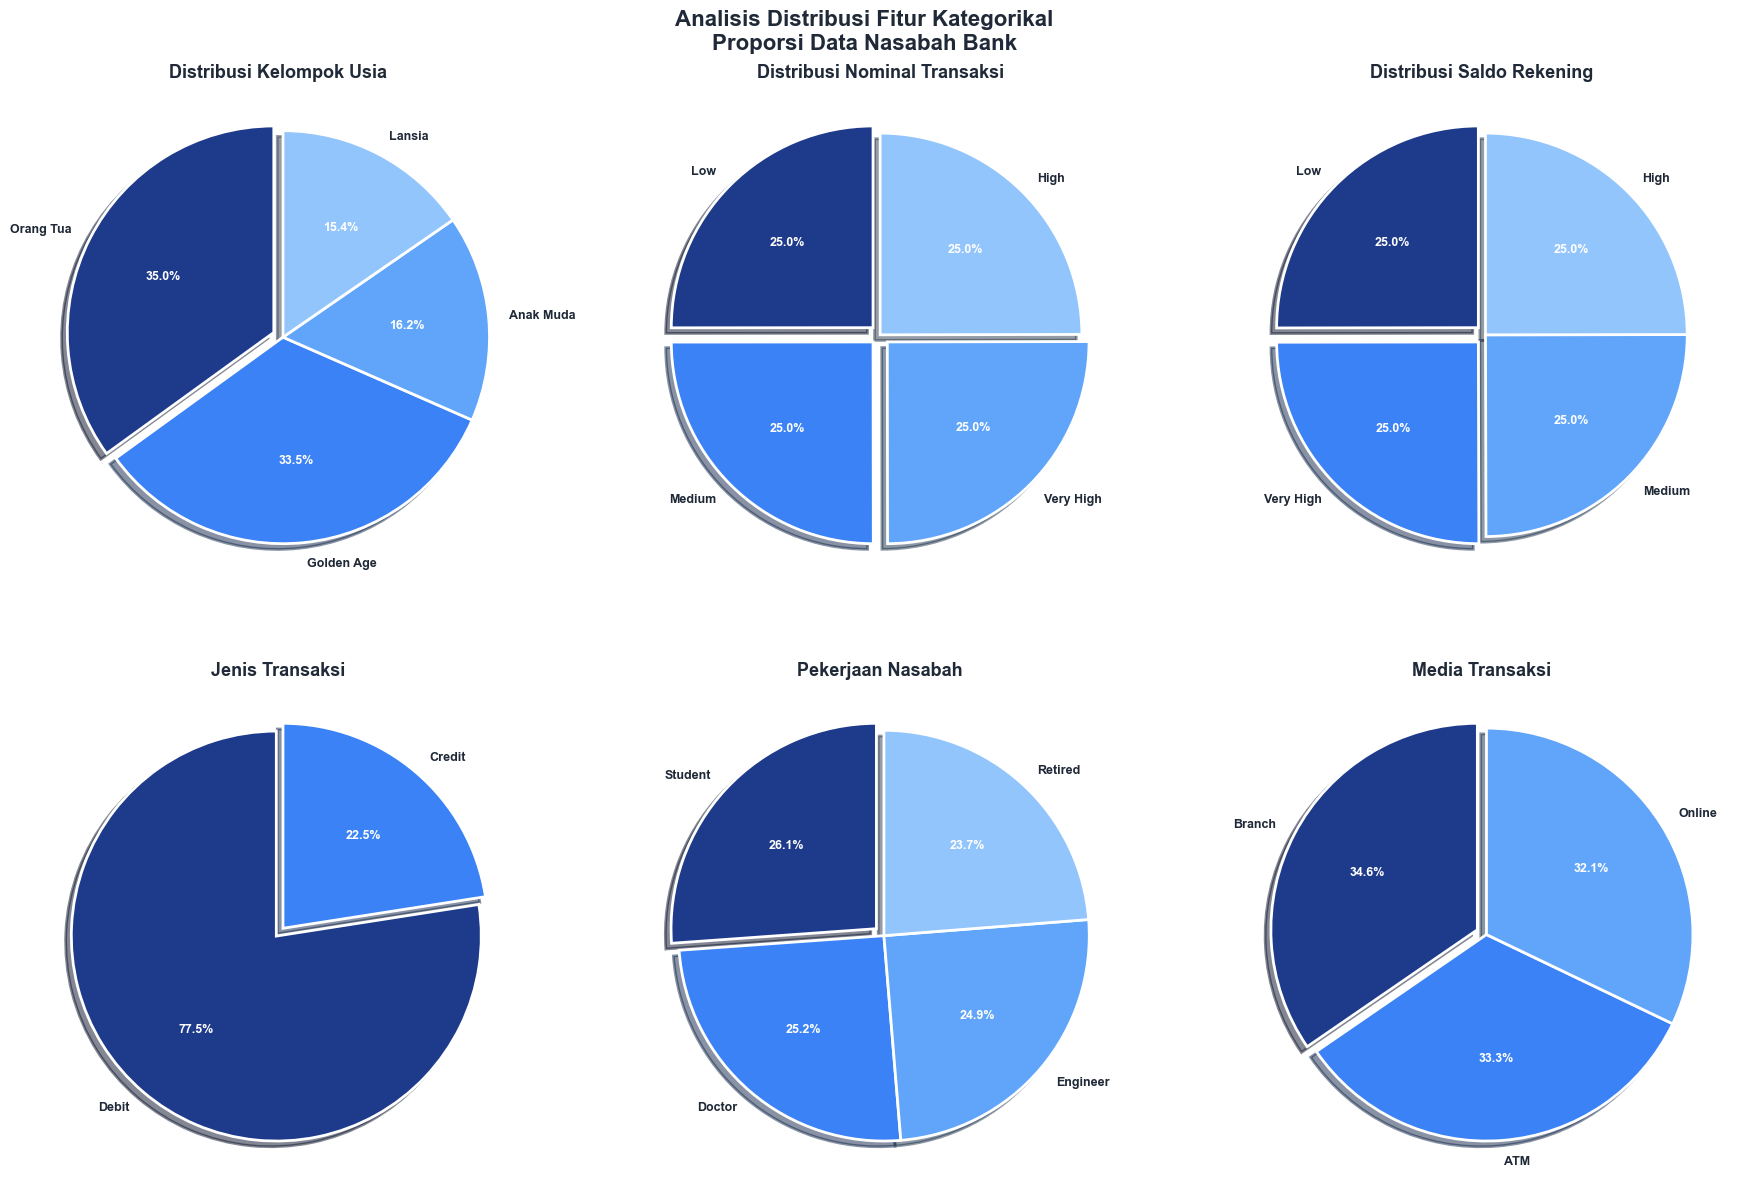

In [1459]:
# Daftar fitur dan judul
features = [
    'AgeGroup',
    'TransactionAmountGroup', 
    'AccountBalanceGroup',
    'TransactionType',
    'CustomerOccupation',
    'Channel'
]

titles = [
    'Distribusi Kelompok Usia',
    'Distribusi Nominal Transaksi', 
    'Distribusi Saldo Rekening',
    'Jenis Transaksi',
    'Pekerjaan Nasabah',
    'Media Transaksi'
]

# Warna kesukaan
blue_palette = [
    '#1E3A8A',
    '#3B82F6',
    '#60A5FA',
    '#93C5FD',
    '#DBEAFE',
    '#F0F9FF' 
]

# Setup figure 
fig, axes = plt.subplots(2, 3, figsize=(18, 12), facecolor='white')
axes = axes.flatten()

# Loop untuk setiap fitur
for i, feature in enumerate(features):
    ax = axes[i]
    
    # Hitung proporsi data
    counts = df_binning[feature].value_counts()
    labels = counts.index.tolist()
    values = counts.values.tolist()
    
    num_categories = len(labels)
    if num_categories <= len(blue_palette):
        colors = blue_palette[:num_categories]
    else:
        # Kalau kategori lebih banyak, gunakan gradient biru
        colors = plt.cm.Blues(np.linspace(0.3, 0.9, num_categories))
    
    explode = [0.05 if val == max(values) else 0 for val in values]
    
    # pie chart 
    wedges, texts, autotexts = ax.pie(
        values, 
        labels=labels,
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        shadow=True,
        startangle=90,
        textprops={'fontsize': 10, 'fontweight': '600'},
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'}
    )
    
    # Styling untuk persentase text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)
    
    # Styling untuk label text
    for text in texts:
        text.set_fontsize(9)
        text.set_fontweight('600')
        text.set_color('#1F2937')
    
    # Judul subplot dengan styling
    ax.set_title(
        titles[i], 
        fontsize=13, 
        fontweight='bold',
        color='#1F2937',
        pad=20
    )
    
    # Memastikan pie chart terlihat bulat
    ax.axis('equal')

# Judul utama dengan styling yang konsisten
plt.suptitle(
    'Analisis Distribusi Fitur Kategorikal\nProporsi Data Nasabah Bank', 
    fontsize=16, 
    fontweight='bold',
    color='#1F2937',
    y=0.98
)

# Buat rapihin aja sih
plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.3, wspace=0.2)
plt.show()

```
Kelompok Usia
```
- Yaps inilah buktinya seperti yang dikatakan kita tadi yang paling banyak menggunakan bank ini adalah usia Golden Age atau usia 25 - 45 Tahun dengan proporsi 33.5%, ini terbukti karena di usia segini perlu banget bank untuk nabung mungkin untuk investasi mungkin, berbelanja udah pasti dan melakukan kegiatan lain lagi. Terus ada orang tua dengan proporsi 35%, karena untuk bayar anaknya kuliah, transfer anaknya yang jauh lagi ngekos kaya aku, beliin istri skincare, dan juga lain lain kalau kata bapak akumah hehehe.
- Terbukti juga kan student dan lansia sangat sedikit ini udah lah ya udah aku jelaskan juga tadi di visualisasi bivariate. Maka dapat disimpulkan distibusinya lumayan merata meskipun lansia dan juga student sangat jarang karena wajar lah.

```
Nominal Transaksi dan Saldo Rekening
```
- Ini keren sih bagus banget semuanya rata ada nominal yang kecil, standard, cukup banyak, dan sangat banyak juga. Wih mengejutkan juga ini kenapa bisa seperti ini Saldo Rekening nya jug sama loh rata semuanya, oh iya baru inget kita pake metode quantil buat binning nya jadi pasti sama.

```
Jenis Transaksi
```
- Yaps inilah dia buktinya tadi, orang orang sukanya membayar langsung di muka jarang sekali ada yang ngutang, adasih mungkin kaerna urgensi yang sudah kita bicarakan tadi, ini wajar bener bener wajar, tapi masalahnaya inilah IMBALANCE DATA. Sampel nya sangat jomplang sekali.

```
Jenis Pekerjaan dan Media Transaksi
```
- Ini mah udah bagus lah ya semuanya merata.


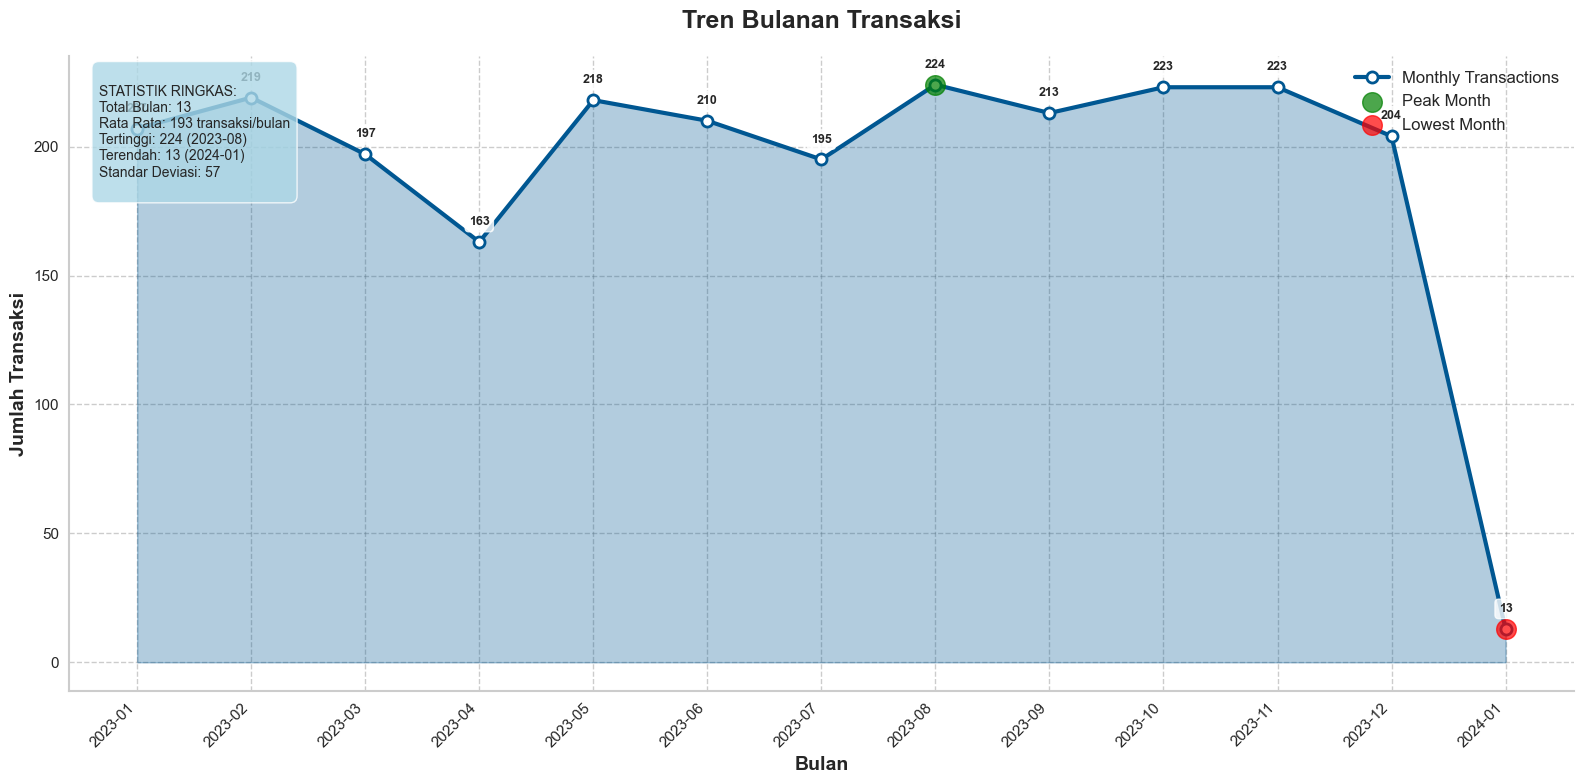

INSIGHTS DARI TREN BULANAN:
Bulan dengan transaksi tertinggi: 2023-08 (224 transaksi)
Bulan dengan transaksi terendah: 2024-01 (13 transaksi)
Variabilitas: Rendah
Trend keseluruhan: TURUN


In [1460]:
# Mengubah tipe data dulu
df_binning['TransactionDate'] = pd.to_datetime(df_binning['TransactionDate'])

# Mengambil Tren bulanan
tren_bulanan = df_binning.groupby(df_binning['TransactionDate'].dt.strftime('%Y-%m')).size()

# Membuat Visualisasinya
fig, ax = plt.subplots(figsize=(16, 8))

# Styling yang lebih mantep
line = ax.plot(tren_bulanan.index, tren_bulanan.values, 
               marker='o', linestyle='-', color='#005792', 
               linewidth=3, markersize=8, markerfacecolor='white', 
               markeredgecolor='#005792', markeredgewidth=2,
               label='Monthly Transactions'
               )

ax.fill_between(tren_bulanan.index, tren_bulanan.values, alpha=0.3, color='#005792')

# Untuk title dan labels
ax.set_title('Tren Bulanan Transaksi', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Bulan', fontsize=14, fontweight='bold')
ax.set_ylabel('Jumlah Transaksi', fontsize=14, fontweight='bold')

# Ticks dan grid 
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
ax.grid(True, linestyle='--', alpha=0.4, color='gray')

# Antonasi 
for i, v in enumerate(tren_bulanan.values):
    ax.annotate(f'{v:,}', 
                xy=(i, v), 
                xytext=(0, 10), 
                textcoords='offset points',
                ha='center', va='bottom', 
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Highlight highest dan lowest points
max_idx = tren_bulanan.values.argmax()
min_idx = tren_bulanan.values.argmin()

ax.scatter(max_idx, tren_bulanan.values[max_idx], 
           color='green', s=200, zorder=5, alpha=0.7, label='Peak Month')
ax.scatter(min_idx, tren_bulanan.values[min_idx], 
           color='red', s=200, zorder=5, alpha=0.7, label='Lowest Month')

# Spine styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

# Stats box
stats_text = f'''
STATISTIK RINGKAS:
Total Bulan: {len(tren_bulanan)}
Rata Rata: {tren_bulanan.mean():.0f} transaksi/bulan
Tertinggi: {tren_bulanan.max():,} ({tren_bulanan.index[max_idx]})
Terendah: {tren_bulanan.min():,} ({tren_bulanan.index[min_idx]})
Standar Deviasi: {tren_bulanan.std():.0f}
'''

ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
        verticalalignment='top', fontsize=10,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# Bonus: Insight summary
print('INSIGHTS DARI TREN BULANAN:')
print(f'Bulan dengan transaksi tertinggi: {tren_bulanan.index[max_idx]} ({tren_bulanan.max():,} transaksi)')
print(f'Bulan dengan transaksi terendah: {tren_bulanan.index[min_idx]} ({tren_bulanan.min():,} transaksi)')
print(f'Variabilitas: {"Tinggi" if tren_bulanan.std()/tren_bulanan.mean() > 0.3 else "Rendah"}')

# Trend analysis
if tren_bulanan.iloc[-1] > tren_bulanan.iloc[0]:
    print('Trend keseluruhan: NAIK')
else:
    print('Trend keseluruhan: TURUN')

- Jika kita lihat dari visualisasi yang sudah kita buat ditemukan bahwa bulan dengan jumlah transaksi terbanyak adalah pada bulan agustus tahun 2023, yang dimana mencapai 224 Transaksi, terus menurun sangat tajam pada awal tahun 2024 gak tau kenapa ini, kayanya datanya emang niatnya dicatat pertahun deh kayanya.
- Terus untuk variabilitas dan trend kesluruahannya memang turun karena ini nih 2024 ini padahal bank ini di 2023 gg banget.

# **4. Pembersihan dan Pra Pemrosesan Data**

## Identifikasi Missing Values

In [1461]:
# Mengambil data dari df kembali
procesed_df = df.copy()

# Mengecek jumlah missing values
missing_values = procesed_df.isnull().sum()
missing_valeus_percentage = (missing_values / len(procesed_df)) * 100

# Menampilkan missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_valeus_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0]

# Menampilkan DataFrame missing values
missing_df

,Missing Values,Percentage
TransactionID,29,1.143082
AccountID,21,0.827749
TransactionAmount,26,1.024832
TransactionDate,28,1.103666
TransactionType,30,1.182499
Location,30,1.182499
DeviceID,30,1.182499
IP Address,20,0.788333
MerchantID,23,0.906583
Channel,27,1.064249


- Disini bisa kita lihat bahwa semua fitur yang terdapat di dataset ini memiliki missing values.

## Identifikasi Duplikasi Data

In [1462]:
# Mencari baris yang terduplikasi
print(f'Jumlah data baris yang terduplikasi adalah {procesed_df.duplicated().sum()} baris')

Jumlah data baris yang terduplikasi adalah 21 baris


- Ternyata ada data yang terduplikasi sebanyak 21 saja.

## Mengubah Tipe Data

In [1463]:
procesed_df[['TransactionDate', 'PreviousTransactionDate']] = procesed_df[['TransactionDate', 'PreviousTransactionDate']].apply(pd.to_datetime)

# Memastikan tipe data sudah terganti
procesed_df[['TransactionDate', 'PreviousTransactionDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionDate          2509 non-null   datetime64[ns]
 1   PreviousTransactionDate  2513 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 39.8 KB


## Melakukan Feature Scaling

In [1464]:
# Menggunakan MinMaxScaler untuk normlaisasi fitur numerik
numerical_feature = procesed_df.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()
procesed_df[numerical_feature] = scaler.fit_transform(procesed_df[numerical_feature])

# Menampilkan hasilnya
procesed_df[numerical_feature].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,0.154987,0.430297,0.377320,0.030405,0.336914
std,0.152295,0.287699,0.241650,0.148617,0.262018
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042239,0.145161,0.182759,0.000000,0.094340
50%,0.110014,0.435484,0.351724,0.000000,0.311416
75%,0.215152,0.661290,0.520690,0.000000,0.508945
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Menghapus Fitur Fitur yang tidak relevan

In [1465]:
# Eksekusi
procesed_df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate','PreviousTransactionDate'], inplace=True)

- Plis Reviewer jangan di tolak gara gara aku hapus fitur bertipe datetime yah, karena menurut aku gak berguna banget, saolnya setelah aku coba beberapa kali di ekstraksi fitur menjadi hour, day, month dan month juga hasil clustering nya malah jelek para review, meskipun aku masukan langsung gak aku ekstraksi malah makin parah.

## Melakukan Feature Encoding

In [1466]:
# Menggunakan Label Encoder untuk fitur kategorikal
categorical_features = procesed_df.select_dtypes(include=['object']).columns.tolist()

# Inisialisasi LabelEncoder
encoder = {}
for feature in categorical_features:
    le = LabelEncoder()
    procesed_df[feature] = le.fit_transform(procesed_df[feature])
    encoder[feature] = le

# Menampilkan hasil encoding
procesed_df[categorical_features].head()

,TransactionType,Location,Channel,CustomerOccupation
0,1,36,0,0
1,1,15,0,0
2,1,23,2,3
3,1,33,2,3
4,0,1,2,3


## Memeriksa Seluruh Fitur Yang Ada

In [1467]:
procesed_df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

- Inilah dia fitur fitur yang akan di gunakan untuk clustering.

## Mengatasi Missing Values

In [1468]:
expected_uniques = {
    'TransactionType': 2,
    'Channel': 3,
    'CustomerOccupation': 4,
    'Location': 44
}

print('Sebelum Restore Nilai Aneh Ke NaN:\n')
for col in categorical_features:
    if col in procesed_df.columns:
        current_unique = procesed_df[col].nunique()
        expected = expected_uniques.get(col, 'unknown')
        print(f'{col}: {current_unique} unique seharusnya aslinya: {expected}')
        print(f'Top values: {procesed_df[col].value_counts().head(3).to_dict()}\n')

print('\n' + '='*40)
print('Eksekusi Restore Nilai Aneh Ke NaN:')

# Smart restore untuk setiap categorical feature
for col in categorical_features:
    if col in procesed_df.columns and col in expected_uniques:
        current_unique = procesed_df[col].nunique()
        expected_unique = expected_uniques[col]
        
        print(f'\nProses {col} Mamang')
        
        if current_unique > expected_unique:
            # Ambil top N values yang valid (berdasarkan count tertinggi)
            top_values = procesed_df[col].value_counts().head(expected_unique).index.tolist()
            
            # Restore sisanya ke NaN
            mask = ~procesed_df[col].isin(top_values)
            restore_count = mask.sum()
            
            if restore_count > 0:
                procesed_df.loc[mask, col] = np.nan
                print(f'Restored Detected {restore_count} invalid values to NaN')
                print(f'Ini yang bener nih: {top_values}')
            else:
                print(f'No invalid values found')
        else:
            print(f'{col} Udah bersih inimah dari sononya ({current_unique} <= {expected_unique})')

print('\n' + '='*40)
print('After Nilai Aneh Teratasi:')
for col in categorical_features:
    if col in procesed_df.columns:
        unique_count = procesed_df[col].nunique()
        missing_count = procesed_df[col].isnull().sum()
        print(f'{col}: {unique_count} unique, {missing_count} missing')
        if missing_count > 0:
            print(f'  Valid values: {procesed_df[col].dropna().value_counts().to_dict()}')

print(f'\nTotal Missing Values setelah pengatasan nilai unique aneh adalah: {procesed_df.isnull().sum().sum()}')
print('='*60)

Sebelum Restore Nilai Aneh Ke NaN:

TransactionType: 3 unique seharusnya aslinya: 2
Top values: {1: 1942, 0: 565, 2: 30}

Location: 44 unique seharusnya aslinya: 44
Top values: {13: 71, 20: 69, 28: 69}

Channel: 4 unique seharusnya aslinya: 3
Top values: {1: 868, 0: 836, 2: 806}

CustomerOccupation: 5 unique seharusnya aslinya: 4
Top values: {3: 657, 0: 633, 1: 627}


Eksekusi Restore Nilai Aneh Ke NaN:

Proses TransactionType Mamang
Restored Detected 30 invalid values to NaN
Ini yang bener nih: [1, 0]

Proses Location Mamang
Location Udah bersih inimah dari sononya (44 <= 44)

Proses Channel Mamang
Restored Detected 27 invalid values to NaN
Ini yang bener nih: [1, 0, 2]

Proses CustomerOccupation Mamang
Restored Detected 23 invalid values to NaN
Ini yang bener nih: [3, 0, 1, 2]

After Nilai Aneh Teratasi:
TransactionType: 2 unique, 30 missing
  Valid values: {1.0: 1942, 0.0: 565}
Location: 44 unique, 0 missing
Channel: 3 unique, 27 missing
  Valid values: {1.0: 868, 0.0: 836, 2.0: 806

- Disini aku membuat sebuah syntax code yang tujuan nya adalah untuk mengecek kembali nilai unik sebenarnya, karena tadi aku mengecek nilai unik dari semua fitur kategorikal nambah 1. Di Bawah buktinya.

    ```python
    TransactionType        3
    Location              44
    Channel                4
    CustomerOccupation     5
    ```

- Kemungkinan ini karena kita scaling terlebih dahulu dan encoding seharusnya kita bersihkan terlebih dahulu dataset kita dari missing values, inkonsistensi data, dan juga dari suplikasi baru kita scaling dan encoding, ini juga merujuk kepada materi CodingCamp tentang Machine Leraning WorkFlow.



In [1469]:
# Menghapus Missing Values yang terdapat di semua fitur kosong takutnya ada 
procesed_df.dropna(how='all')
procesed_df.dropna(axis=1, how='all') 

print('EKSEKUSI MISSING VALUES')
print('=' * 60)

# Mengatasi Missing Values pada fitur numerik
for col in numerical_feature:
    if col in procesed_df.columns:
        missing_before = procesed_df[col].isnull().sum()
        if missing_before > 0:
            median_value = procesed_df[col].median()
            procesed_df[col] = procesed_df[col].fillna(median_value)

print(f'Missing Values in Numerical done mamang!!! sisa missing values: {procesed_df.isnull().sum().sum()}')

# Mengatasi Missing Values pada fitur kategorikal
for col in categorical_features:
    if col in procesed_df.columns:
        missing_before = procesed_df[col].isnull().sum()
        if missing_before > 0:
            mode_value = procesed_df[col].mode()[0] if not procesed_df[col].mode().empty else 'Unknown'
            procesed_df[col] = procesed_df[col].fillna(mode_value)

print(f'Missing Values in Categorical done mamang!!! sisa missing values: {procesed_df.isnull().sum().sum()}')
print('=' * 60)

# Validasi Ahkir 
print('Missing Values per kolom:')
print(procesed_df.isnull().sum())
print(f'\nTotal Missing Values: {procesed_df.isnull().sum().sum()}')
print(f'Shape final: {procesed_df.shape}')

EKSEKUSI MISSING VALUES
Missing Values in Numerical done mamang!!! sisa missing values: 80
Missing Values in Categorical done mamang!!! sisa missing values: 0
Missing Values per kolom:
TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

Total Missing Values: 0
Shape final: (2537, 9)


- Dan Disini aku memutuskan untuk menggunakan MinMaxScaler, kenapa tidak StandardScaler karena menurut aku StandardScaler kalau distribusi nya tidak terlihat normal, maka dia akan memaksa distribusi nya menjadi normal, dan MinMaxScaler tidak akan memaksa distribusi nya menjadi normal tapi mempertahankan keaslian dari dataset kita, inilah yang membuat aku memilih MinMax.
- Kalau Encoding nya aku menggunakan LabelEncoder karena mungkin kalau semuanya kita sama ratakan menjadi one hot itu bakal benar benar menambah dimensi dari feature kita, apalagi location tuh banyak sekali, seharusnya sih menggunakan count encoding tapi yasudah lah ini aku mengikuti templet nya saja.

In [1470]:
procesed_df[categorical_features].nunique()

TransactionType        2
Location              44
Channel                3
CustomerOccupation     4
dtype: int64

- Dan yaps inilah dia terbuktikan sekarang sudah balik lagi ke normal.

## Menangani Duplikasi Data

In [1471]:
procesed_df.drop_duplicates(keep='first', inplace=True)

print(f'Jumlah duplikasi setelah penghapusan: {procesed_df.duplicated().sum()}')

Jumlah duplikasi setelah penghapusan: 0


## Handling Outliers

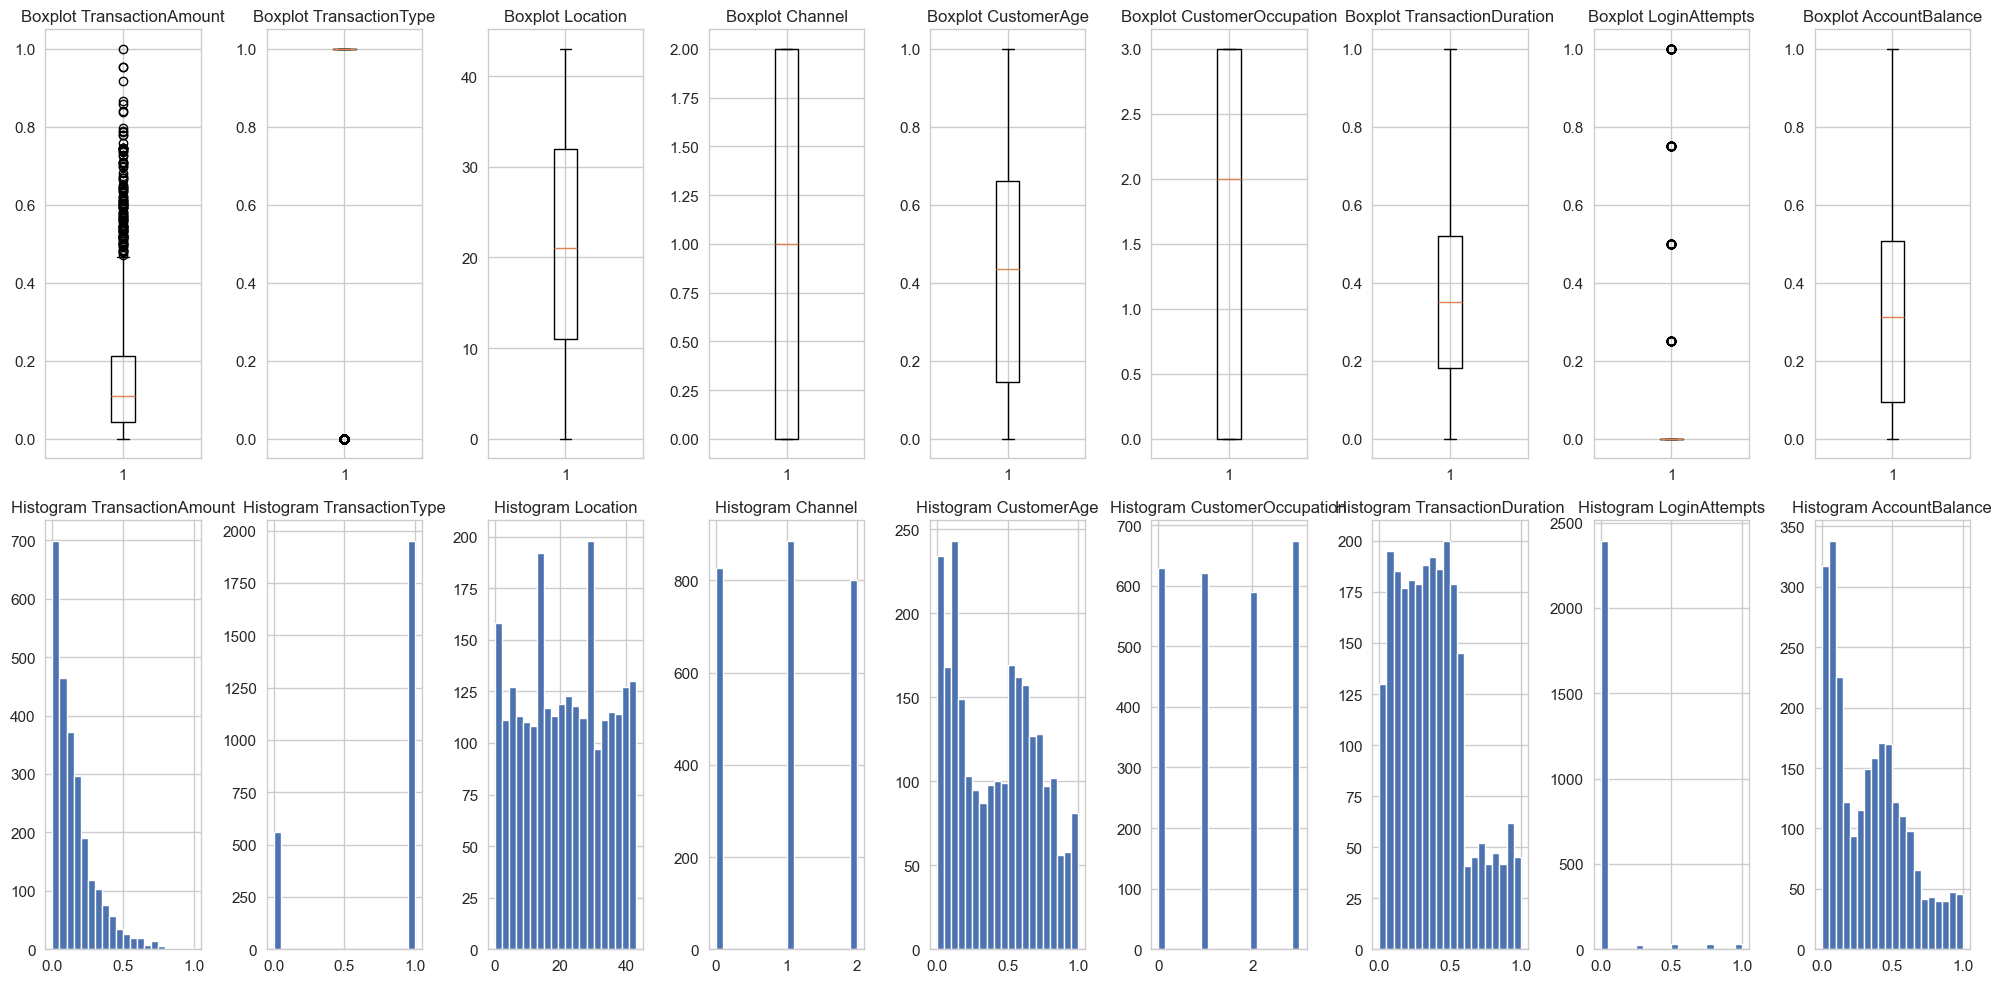

TransactionAmount: 113 outliers detected
TransactionType: 562 outliers detected
Location: 0 outliers detected
Channel: 0 outliers detected
CustomerAge: 0 outliers detected
CustomerOccupation: 0 outliers detected
TransactionDuration: 0 outliers detected
LoginAttempts: 120 outliers detected
AccountBalance: 0 outliers detected


In [1472]:
all_num_features = procesed_df.select_dtypes(include='number').columns.tolist()

# Memvisualisasikan Distribusi Keseluruhan data
fig, ax = plt.subplots(2, len(all_num_features), figsize=(20, 10))
for i, feature in enumerate(all_num_features):
    if col in all_num_features:
        # Boxplot
        ax[0, i].boxplot(procesed_df[feature])
        ax[0, i].set_title(f'Boxplot {feature}')

        # Histogram
        ax[1, i].hist(procesed_df[feature], bins=20)
        ax[1, i].set_title(f'Histogram {feature}')

plt.tight_layout()
plt.show()

# IQR Method untuk detect outliers
def detect_outliers_iqr(df, cols):
    outlier_indices = []
    
    for col in cols:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outlier_indices.extend(outliers)
            
            print(f'{col}: {len(outliers)} outliers detected')
    
    return list(set(outlier_indices))

# Eksekusi deteksi outliers
outlier_indices = detect_outliers_iqr(procesed_df, all_num_features)


- Ternyata di temukan lah outliers pada Kolom Numeric dan juga categorical, Kalau di numeric pasti ada **Transaction Amount**, kaerna pasti setiap nominal transaksi seluruh umat manusia itu berbeda beda, dan disini di buktikan, terus pada **LoginAttempts** ini sepertinya nilai 5 kali percobaan yang jadi masalahnya aku yakin banget sih.
- Terus pada fitur Categorical ada di TransactioType, ini mungkin benar karena mengingat kejomplangan nya yang lumayan parah yang dikuasi oleh Debit seoarang

> Disini aku bakal menangani nya satu persatu.

SEBELUM PENANGANAN OUTLIERS
Skewness awal Transaction Amount adalah : 1.756


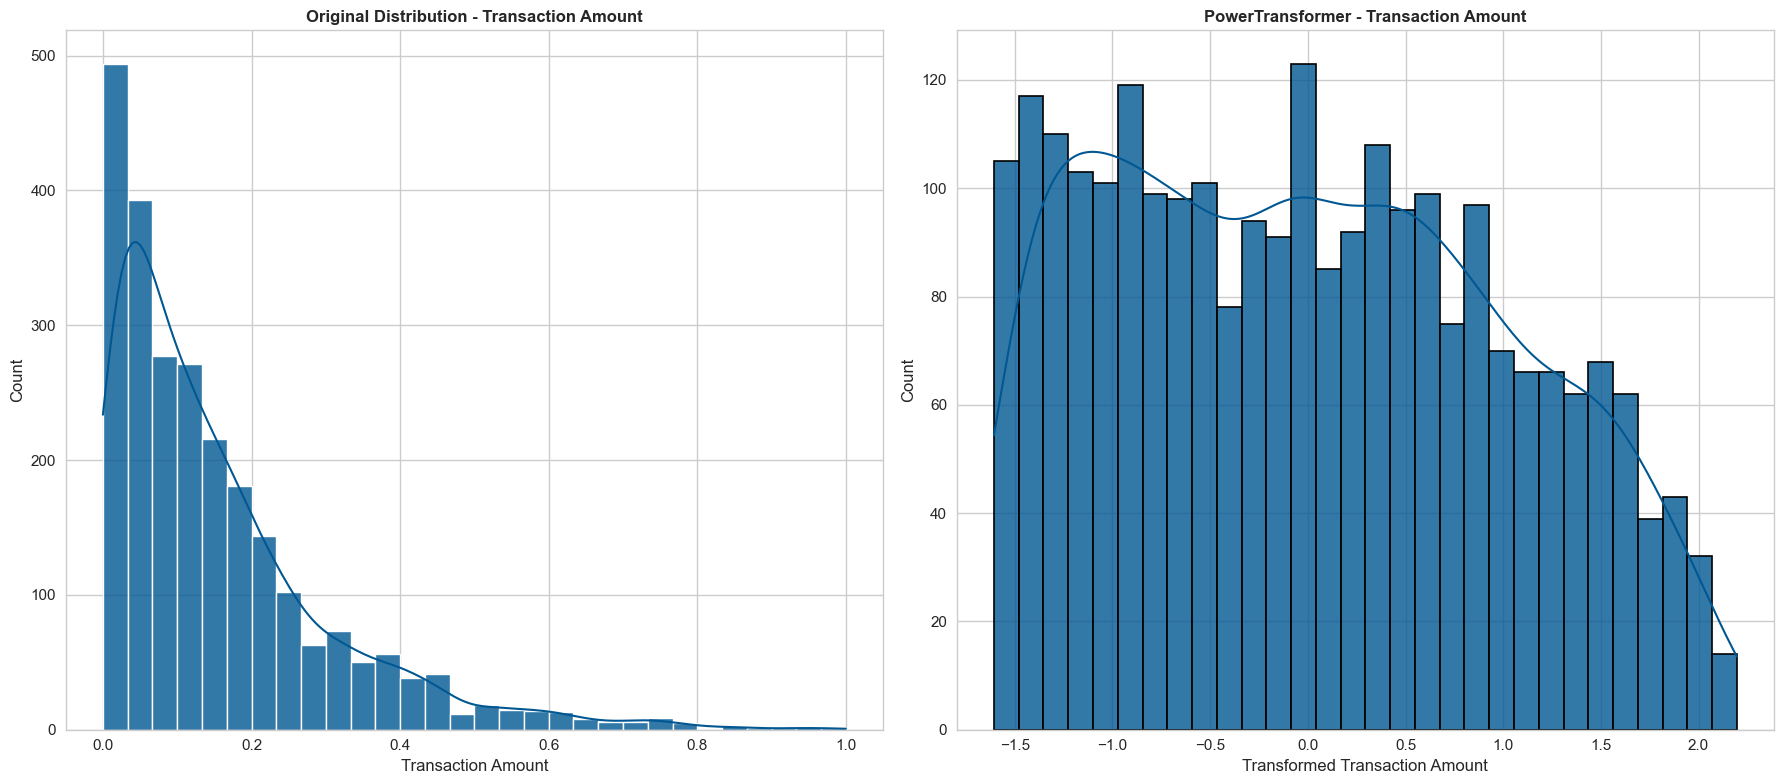


SESUDAH MENANGANI OUTLIERS
Skewness akhir Transaction Amount adalah : 0.223


In [1473]:
# ================= Penanganan Outliers di fitur TransactionAmount ==============
# Cek distribusi awal
print('SEBELUM PENANGANAN OUTLIERS')
print(f'Skewness awal Transaction Amount adalah : {procesed_df["TransactionAmount"].skew():.3f}')

# Visualisasi dengan histplot
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  

# Untuk warna
blues_color = '#005792'

# Plot 1: Original distribution
sns.histplot(
    data=procesed_df,  
    x='TransactionAmount',  
    kde=True,
    ax=ax[0],
    bins=30,
    color=blues_color,
    alpha=0.8
)
ax[0].set_title('Original Distribution - Transaction Amount', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Transaction Amount')

# Pake Power Transformer 
pt = PowerTransformer(method='yeo-johnson', standardize=True)
amount_transformed = pt.fit_transform(procesed_df[['TransactionAmount']])

# Plot 2: Yeo-Johnson transformation
sns.histplot(
    x=amount_transformed.flatten(),
    kde=True,
    ax=ax[1],
    bins=30,
    color=blues_color,
    alpha=0.8,
    edgecolor='black', 
    linewidth=1.2
)
ax[1].set_title('PowerTransformer - Transaction Amount', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Transformed Transaction Amount')

plt.tight_layout()
plt.show()

# Apply transformation
procesed_df['TransactionAmount'] = amount_transformed.flatten()

print(f'\nSESUDAH MENANGANI OUTLIERS')
print(f'Skewness akhir Transaction Amount adalah : {procesed_df["TransactionAmount"].skew():.3f}')

- Look at This jadi keren kan tanpa menghapus atau capping atau apalah itu, ini aku nemu di website medium caranya, keren jugaya. Kenapa aku memilih teknik ini karena mengingat tujuan submission ini clustering dengan Kmeans, yang pastinya Kmeans masalah banget dengan distance atau jarak, maka jika kita menggunakan teknik ini, dia bakal ngepres data menjadi normal, tanpa menghapus data itu sendiri. 
- Lihat dari yang awalnya punya skewens skor yang parah 1.7 di cekek sampai 0.2. Keren kan. Penjelasan lengkap nya bisa kunjungi website scikit learn atau klik link [ini](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html).

Distribusi TransactionType:
Type 1.0: 1951 (77.6%)
Type 0.0: 562 (22.4%)

Total transactions: 2513

Minority classes (< 5%):


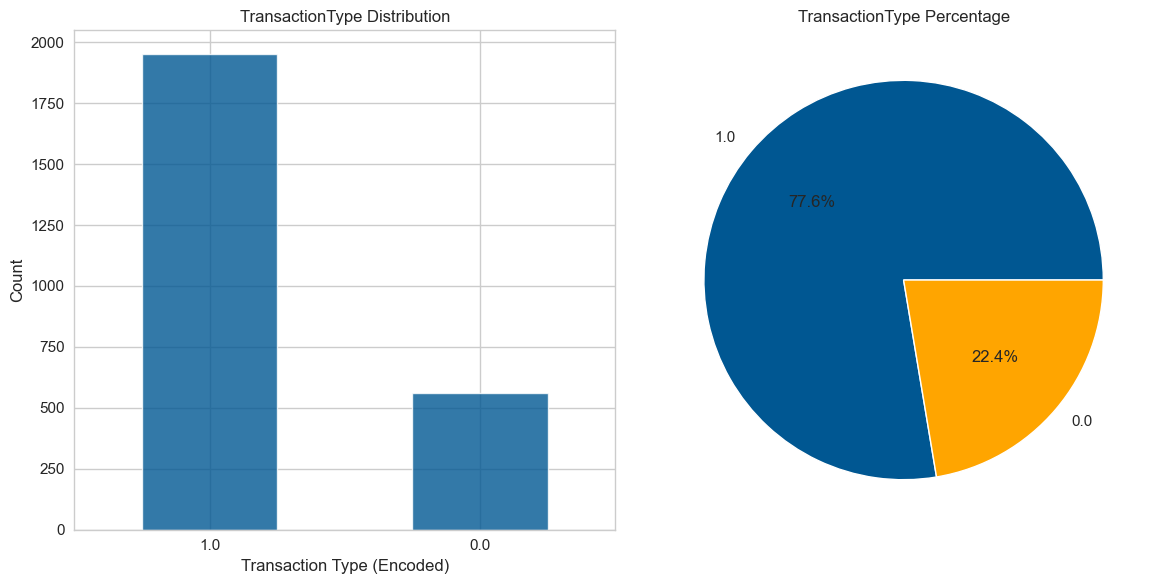

In [1474]:
# ================= Analisis TransactionType Imbalance ==============
# Cek distribusi TransactionType 
tx_type_dist = procesed_df['TransactionType'].value_counts()
print('Distribusi TransactionType:')
for value, count in tx_type_dist.items():
    percentage = (count/len(procesed_df))*100
    print(f'Type {value}: {count} ({percentage:.1f}%)')

print(f'\nTotal transactions: {len(procesed_df)}')

# Identifikasi minority class
minority_threshold = len(procesed_df) * 0.05
minority_classes = tx_type_dist[tx_type_dist < minority_threshold]

print(f'\nMinority classes (< 5%):')
for cls, count in minority_classes.items():
    percentage = (count/len(procesed_df))*100
    print(f'  Type {cls}: {count} ({percentage:.1f}%) - RARE CLASS')

# Visualisasi imbalance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
tx_type_dist.plot(kind='bar', color='#005792', alpha=0.8)
plt.title('TransactionType Distribution')
plt.xlabel('Transaction Type (Encoded)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
tx_type_dist.plot(kind='pie', autopct='%1.1f%%', colors=['#005792', '#FFA500', '#32CD32', '#FF6347', '#9370DB'])
plt.title('TransactionType Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()

- Seperti apa yang aku bilang kan, imbalance datanya sangat kuat menjadikan nilai yang 22% itu di anggap sebagai outliers.
- Setelah aku pikir pikir dengan waktu yang lumayan lama, maka aku memutuskan tidak akan menghapusnya, kenapa? karena kalau kita menggunakan RandomSampling, nanti datanya gak realistis, terus SMOTE juga sama seperti itu, cuma kalau SMOTE jujur aku kurang paham pakeknya setelah mencoba eror terus. Maka aku putushkan untuk keep Imbalance datanya dan juga outliers nya, karena realitanya seperti itu bisa di pake buat insight bisnis lagi oleh bank nya.

In [1475]:
# Mengecek kembali apakah ada outier pada fitur yang sudah kita tangani
outlier_indices = detect_outliers_iqr(procesed_df, all_num_features)

TransactionAmount: 0 outliers detected
TransactionType: 562 outliers detected
Location: 0 outliers detected
Channel: 0 outliers detected
CustomerAge: 0 outliers detected
CustomerOccupation: 0 outliers detected
TransactionDuration: 0 outliers detected
LoginAttempts: 120 outliers detected
AccountBalance: 0 outliers detected


- Dan yaps bisa dilihat semuanya sudah bersih dan clean kecuali 2 Fitur yang sudah kita jelaskan mengapa outliers nya di biarakan. Untuk LoginAttemps aku tarik kembali karena susah banget di proses inverse nya malah jadi ada angka 10 setelah melakukan penghapusan pada 1.0 maka dari itu aku biarkan saja malah memperbagus juga hasil clustering haha.

## Melakukan Teknik Binning

In [1476]:
# Melakukan binning pada fitur 'CustomerAge'
original_age_bins = [18, 25, 45, 65, 80]
min_age = 18
max_age = 80

scaled_age_bins = [(age - min_age) / (max_age - min_age) for age in original_age_bins]
print('Konversi Bins CustomerAge:')
print(f'Original bins: {original_age_bins}')
print(f'Scaled bins: {scaled_age_bins}')
labels_age = ['Anak Muda', 'Golden Age', 'Orang Tua', 'Lansia']

procesed_df['AgeGroup'] = pd.cut(
    procesed_df['CustomerAge'],
    bins=scaled_age_bins,
    labels=labels_age,
    include_lowest=True,
)

# Encoding dengan LabelEncoder
le = LabelEncoder()
procesed_df['AgeGroup'] = le.fit_transform(procesed_df['AgeGroup'])
encoder['AgeGroup'] = le

# Menampilkan hasilnya
procesed_df.head()

Konversi Bins CustomerAge:
Original bins: [18, 25, 45, 65, 80]
Scaled bins: [0.0, 0.11290322580645161, 0.43548387096774194, 0.7580645161290323, 1.0]


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
0,-1.472586,1.0,36,0.0,0.838710,0.0,0.244828,0.0,0.336832,2
1,0.670976,1.0,15,0.0,0.806452,0.0,0.451724,0.0,0.918055,2
2,-0.565951,1.0,23,2.0,0.016129,3.0,0.158621,0.0,0.068637,0
3,-0.198913,1.0,33,2.0,0.129032,3.0,0.051724,0.0,0.569198,1
4,-1.478669,0.0,1,2.0,0.435484,3.0,0.648276,0.0,0.492591,3


- Disini aku melakukan binning kepada Usia, dengan memecahnya menjadi 4 kelompok.

# **5. Membangun Model Clustering**

## Mempersiapkan Dataset untuk Clustering

In [1477]:
clustering_df = procesed_df.copy()

# Menampilkan statistik deskriptif untuk pengecekan
clustering_df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
count,2.513000e+03,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,-7.210044e-17,0.776363,21.276562,0.989256,0.429528,1.520493,0.377539,0.030442,0.336969,1.712296
std,1.000199e+00,0.416765,12.394375,0.804721,0.286158,1.134504,0.240191,0.148702,0.260682,1.118922
min,-1.606670e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.798263e-01,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.095325,1.000000
50%,-4.857432e-02,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.311416,2.000000
75%,7.828307e-01,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.506899,3.000000
max,2.195814e+00,1.000000,43.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,3.000000


- Data Siap di pakai mamang.

## Melakukan Visualisasi Elbow Method untuk mencari K terbaik.

Penerapan Inertia Untuk Insight Tambahan
K = 2: Inertia = 109379.68
K = 3: Inertia = 55729.38
K = 4: Inertia = 35433.80
K = 5: Inertia = 26699.00
K = 6: Inertia = 22508.21
K = 7: Inertia = 19372.97
K = 8: Inertia = 17505.14
K = 9: Inertia = 16329.52
K = 10: Inertia = 15323.90


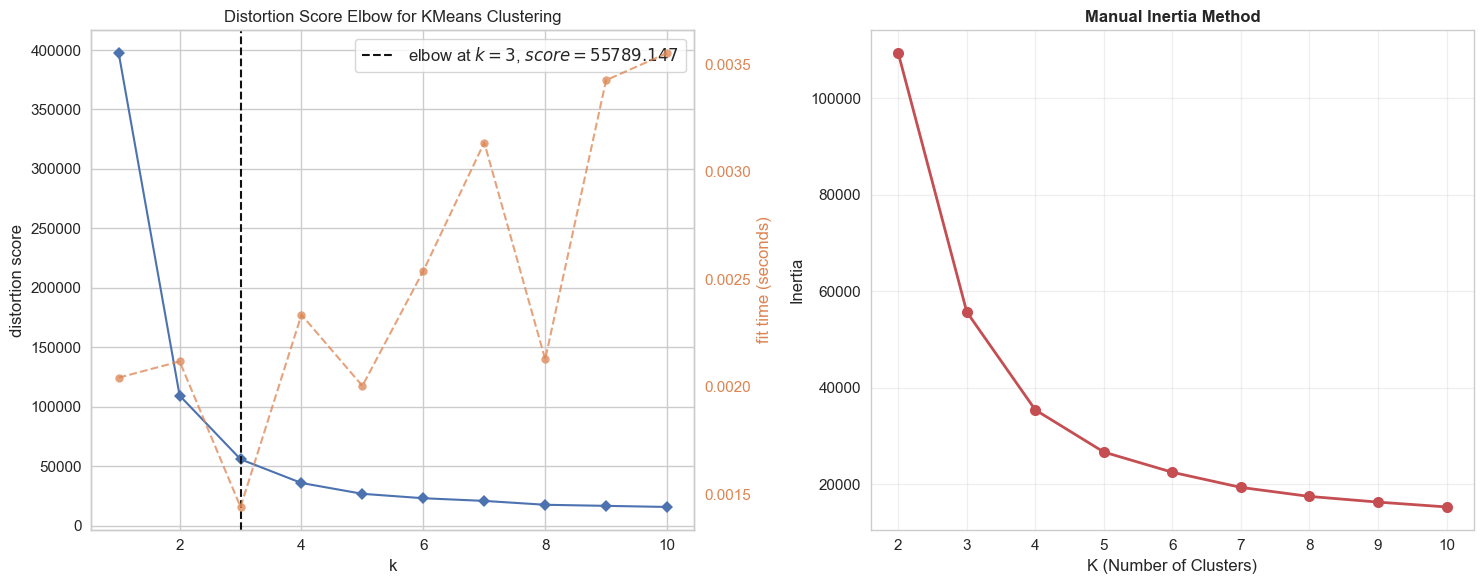


Menurut Visualisasi Elbow Method K Terbaik adalah: 3


In [1478]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Yellowbrick - Distortion (Inertia)
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 11), metric='distortion', ax=ax1)
visualizer.fit(clustering_df)
visualizer.finalize()

# Inertia buat insight tambahan
print('Penerapan Inertia Untuk Insight Tambahan')
k_values = range(2, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_df)
    inertias.append(kmeans.inertia_)
    print(f'K = {k}: Inertia = {kmeans.inertia_:.2f}')

# Plot manual inertia
ax2.plot(k_values, inertias, 'ro-', linewidth=2, markersize=8)
ax2.set_title('Manual Inertia Method', fontweight='bold')
ax2.set_xlabel('K (Number of Clusters)')
ax2.set_ylabel('Inertia')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Menampilkan hasil
print(f'\nMenurut Visualisasi Elbow Method K Terbaik adalah: {visualizer.elbow_value_}')

- Jika kita lihat bahwa menurut Elbow Method K terbaik itu adalah 3, dengan Score 55789.147 tertinggi dan juga terbiak dari semua K yang di uji.

## Melatih Model K-Means Clustering

In [1479]:
# Inisialisasi Model KMeans dengan parameter yang sudah kita observasi
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Melatih model
cluster_labels = kmeans.fit_predict(clustering_df)

# Menambahkan hasil cluster ke DataFrane
clustering_df['Cluster'] = cluster_labels


## Menyimpan Model Menggunakan Joblib

In [1480]:
joblib.dump(clustering_df, 'kmeans_clustering.h5')

['kmeans_clustering.h5']

## Evaluasi Hasil

In [1481]:
def evaluasi_clustering(data, labels, model_name):
    '''
    Fungsi ini hanya untuk menampung hasil evaluasi model, karena kita juga akan menggunakan evaluasi dengan melakukan PCA jadi aku bakal buat saja
    '''
    # Hitung berbagai metrik evaluasi
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)

    # Statistik Parameter Model
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    cluster_counts = pd.Series(labels).value_counts().sort_index()
    
    # Buat dictionary hasil evaluasi
    evaluation_results = {
        'Model': model_name,
        'N Cluster': n_clusters,
        'Silhouette Score': silhouette,
        'Calinski Harabasz Score': calinski,
        'Davies Bouldin Score': davies_bouldin
    }
    
    return evaluation_results

In [1482]:
# Menerapkan Fungsi
results = evaluasi_clustering(clustering_df.drop('Cluster', axis=1), cluster_labels, 'Kmeans - Clustering')

# Menampilkan Hasil
results_df = pd.DataFrame([results])
results_df.head()

,Model,N Cluster,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
0,Kmeans - Clustering,3,0.515333,7694.848513,0.607411


Disini kita bisa lihat dari setiap matrik evaluasinya nih.

```
Silhoette Score
```
- Untuk Silhoette Score nya itu mencapai 0.514, jujur ini menurut aku lumayan walaupun pasti tidak sebagus 0.7 ke atas, tapi disini model **Kmeans** dengan parameter k = 3 mampu memisakhan setiap cluster dengan sangat baik ke dalam 3 kelompok, ini berarti model cukup tegas untuk pemisahan kedalam 3 kelompok.

```
Calinski Harabasz Score
```
- Nah ini baru tinggi kalau menurut aku, score nya ada di 7623, yang menandakan bahwa setiap data di dalam masing masing cluster sangat seragam, atau gampang nya mereka memiliki karakteristik karakteristik yang berbeda di setiap cluster nya, misalkan cluster 1 adalah orang orang yang suka baca buku, sedangkan cluster 2 hobi tawuran, nah itulah perbedaannya tapi di tiap cluster memiliki kesamaan yang seragam (Homogen)

```
Davies-Bouldin Score
```
- Ini juga menurut aku lumayan bagus lah gak terlalu jelek, kalau yang jelek itu di atas 1, karena matrik ini mengukur Seberapa besar penyebaran data di dalam masing masing cluster atau seberapa jauh jarak antar cluster. Jadi semakin mendekati nol semakin bagus juga karena cluster kompak di cluster nya tapi berbeda jauh dengan cluster lain. Tapi yang kita ada di 0.611 lumayan lah ya.


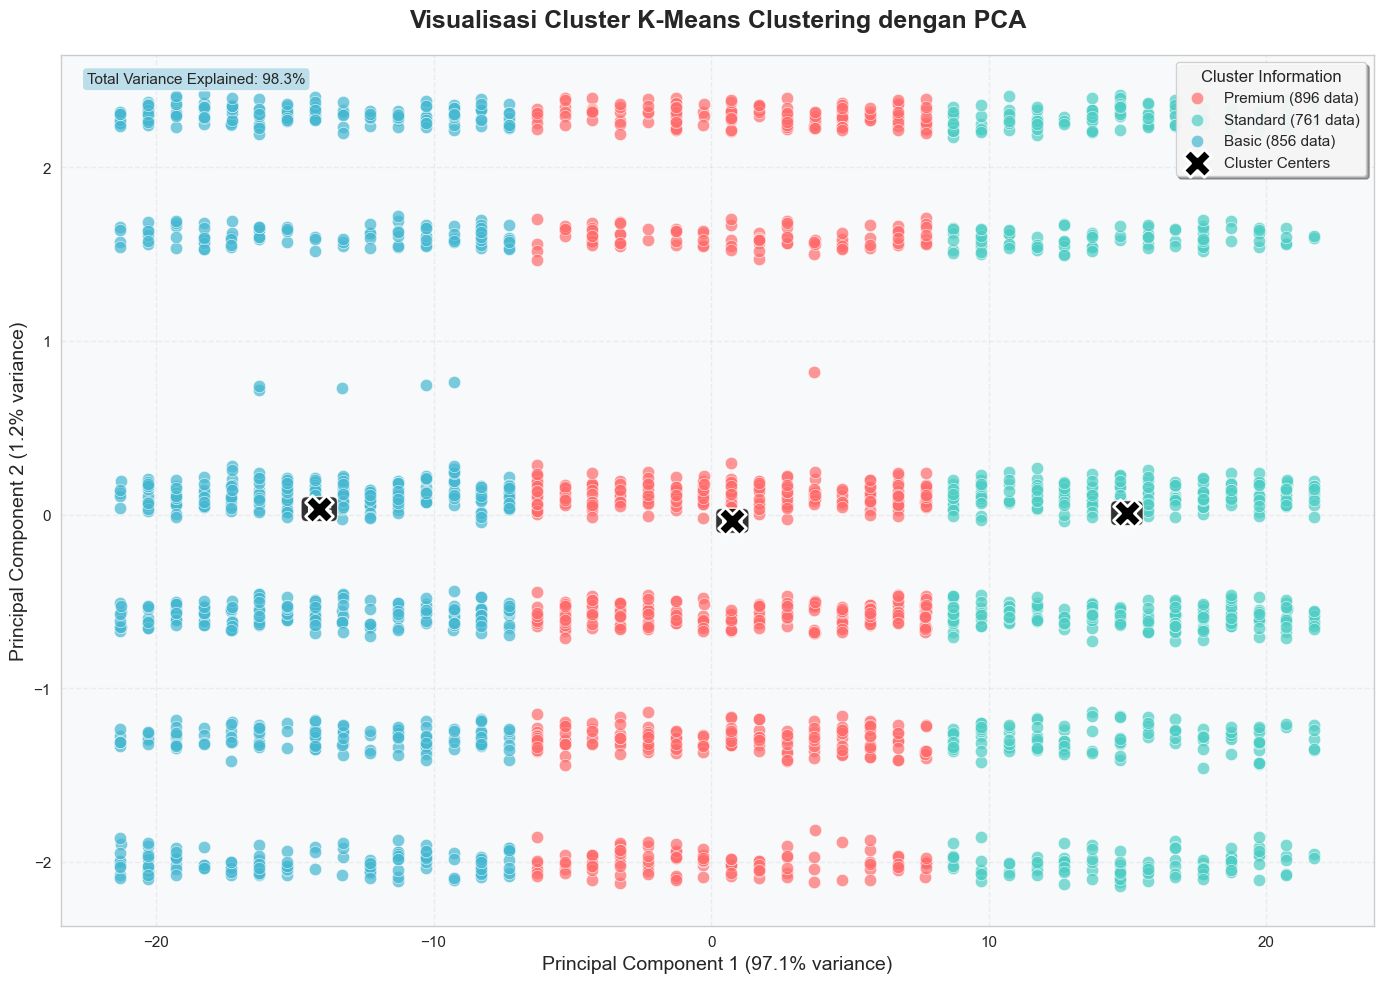

Kesimpulan Clustering:
Total samples: 2513
PCA variance explained: 98.3%
Cluster distribution: {0: np.int64(896), 1: np.int64(761), 2: np.int64(856)}


In [1483]:
# Ngalangin estetika aja ni warning
warnings.filterwarnings("ignore")

# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(clustering_df.drop(columns='Cluster'))

# Transform centroids ke PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Setup figure dengan style yang lebih clean
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 10))

# Color palette yang lebih aesthetic
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
cluster_names = ['Premium', 'Standard', 'Basic']

# Plot setiap cluster dengan style yang berbeda
for i, cluster in enumerate(sorted(clustering_df['Cluster'].unique())):
    cluster_data = X_pca[clustering_df['Cluster'] == cluster]
    cluster_size = len(cluster_data)
    
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1],
              c=colors[i], s=80, alpha=0.7, 
              label=f'{cluster_names[i]} ({cluster_size} data)',
              edgecolor='white', linewidth=0.5)

# Plot centroids dengan style yang menonjol
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
          c='black', s=400, marker='X', 
          label='Cluster Centers', 
          edgecolor='white', linewidth=2,
          zorder=5)

# Menambahkan Label Centroids
for i, (x, y) in enumerate(centroids_pca):
    ax.text(x, y, f'{cluster_names[i][:3]}', 
           fontsize=10, fontweight='bold',
           ha='center', va='center', color='white',
           bbox=dict(facecolor='black', alpha=0.8, 
                    boxstyle='round,pad=0.4', edgecolor='white'))

# Styling 
ax.set_title('Visualisasi Cluster K-Means Clustering dengan PCA', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=14)
ax.set_ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=14)

# Legend styling
legend = ax.legend(title='Cluster Information', 
                  title_fontsize=12, fontsize=11,
                  loc='upper right', frameon=True,
                  fancybox=True, shadow=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Grid styling
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_facecolor('#f8f9fa')

# Info box dengan variance explained
info_text = f'Total Variance Explained: {pca.explained_variance_ratio_.sum():.1%}'
ax.text(0.02, 0.98, info_text, transform=ax.transAxes, 
       fontsize=11, verticalalignment='top',
       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print('Kesimpulan Clustering:')
print(f'Total samples: {len(clustering_df)}')
print(f'PCA variance explained: {pca.explained_variance_ratio_.sum():.1%}')
print(f'Cluster distribution: {dict(clustering_df["Cluster"].value_counts().sort_index())}')

- Dari visualisasi Dengan PCA ini kini kita tau bahwa setiap cluster memiliki jumlah data yang sangat seimbang tidak ada yang mendominasi semuanya sama rata, yang menandakan bahwa kita telah melakukan langkah yang lumayan bisa membagi segmen dengan natural dan fair. 
- Dan inilah yang aku suka pemisahannya yang baik mungkin kalau di 2 Dimensi kita tidak bisa melihat tumpang tindih nya tapi kalau di visualisasi 3 Dimensi ini pasti ada yang tumpang tindih sih, Tapi overall aku bisa katakan KMeans yang kita buat lumayan bagus untuk memecah segmentasi ini.

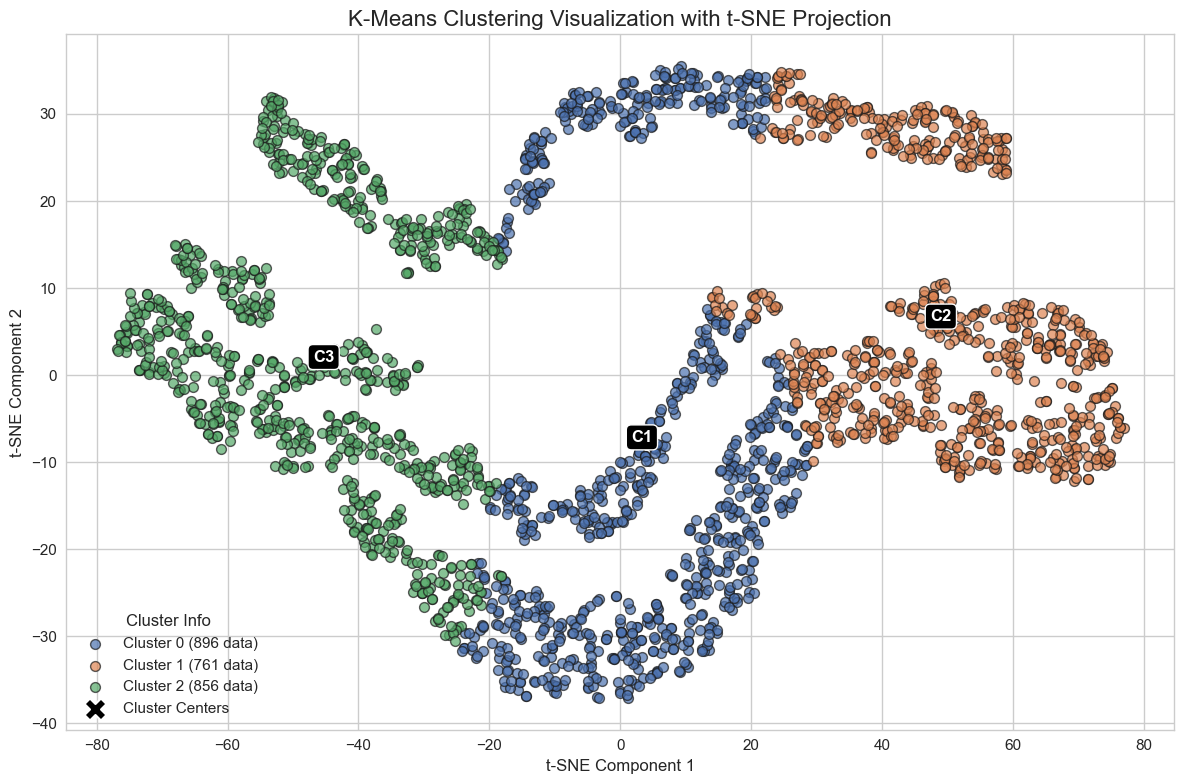

In [1484]:
clustering_df['Cluster'] = cluster_labels

# Tsne
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(clustering_df.drop(columns='Cluster'))

centroids_tsne = []
for cluster in sorted(clustering_df['Cluster'].unique()):
    cluster_mask = clustering_df['Cluster'] == cluster
    cluster_center = X_tsne[cluster_mask].mean(axis=0)
    centroids_tsne.append(cluster_center)

centroids_tsne = np.array(centroids_tsne)

# Warna
plt.figure(figsize=(12, 8))
colors = ['#4c72b0', '#dd8452', '#55a868']

for cluster in sorted(clustering_df['Cluster'].unique()):
    cluster_data = X_tsne[clustering_df['Cluster'] == cluster]
    label = f'Cluster {cluster} ({len(cluster_data)} data)'
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1],
                label=label, s=50, alpha=0.7, color=colors[cluster], edgecolor='k')

# plot centroids
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1],
            c='black', s=250, marker='X', label='Cluster Centers', edgecolor='white', linewidth=1.5)

# in buat label centroids aja
for i, (x, y) in enumerate(centroids_tsne):
    plt.text(x, y, f'C{i+1}', fontsize=12, fontweight='bold',
             ha='center', va='center', color='white',
             bbox=dict(facecolor='black', boxstyle='round,pad=0.3'))


plt.title('K-Means Clustering Visualization with t-SNE Projection', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Cluster Info')
plt.grid(True)

# Merapihkan
plt.tight_layout()
plt.show()

- Ternyata oh ternyata kalau di dari pov visualisasi t-SNE cluster memiliki bentuk yang mirip seperti pulau. Bisa kita lihat kan kalau di t-SNE lihat ada cluster yang overlap terus ada juga yang tumpang tindih kan, ini membuktikan t-SNE itu lebih bisa menangkap data yang tidak linear, karena pada kenyataan nya data di dunia ini jarang sekali yang linear.

## Membangung Model Clustering Dengan PCA

### Mencari Component Terbaik

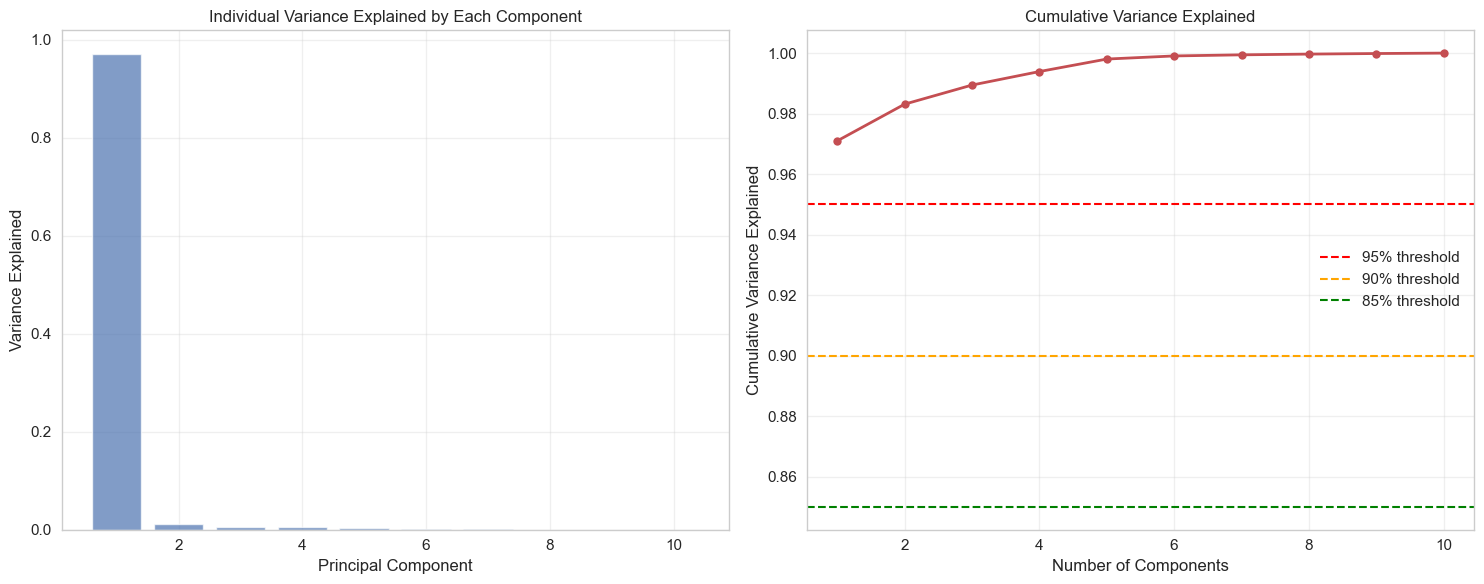

Component Analysis:
PC1: 0.971 (97.1%)
PC2: 0.012 (1.2%)
PC3: 0.006 (0.6%)
PC4: 0.004 (0.4%)
PC5: 0.004 (0.4%)

Cumulative Variance:
80% variance: 1 components
85% variance: 1 components
90% variance: 1 components
95% variance: 1 components
99% variance: 4 components


In [1485]:
# Fit PCA dengan semua komponen
pca_full = PCA()
pca_full.fit(clustering_df.drop(columns='Cluster'))

# Hitung cumulative variance
cumvar = np.cumsum(pca_full.explained_variance_ratio_)

# Visualisasi untuk penentuan komponen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Individual variance per component
ax1.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
        pca_full.explained_variance_ratio_, alpha=0.7)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained')
ax1.set_title('Individual Variance Explained by Each Component')
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative variance
ax2.plot(range(1, len(cumvar) + 1), cumvar, 'ro-', linewidth=2)
ax2.axhline(y=0.95, color='red', linestyle='--', label='95% threshold')
ax2.axhline(y=0.90, color='orange', linestyle='--', label='90% threshold')
ax2.axhline(y=0.85, color='green', linestyle='--', label='85% threshold')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Variance Explained')
ax2.set_title('Cumulative Variance Explained')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print insights
print('Component Analysis:')
for i, var in enumerate(pca_full.explained_variance_ratio_[:5]):
    print(f'PC{i+1}: {var:.3f} ({var*100:.1f}%)')

print(f'\nCumulative Variance:')
thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]
for threshold in thresholds:
    n_components = np.argmax(cumvar >= threshold) + 1
    print(f'{threshold*100:.0f}% variance: {n_components} components')

- Bisa kita lihat Component 1 sangat bagus banget variance nya ini menandakan PCA dapat mereduksi dan juga membungkus dengan sangat baik pada 1 komponen saja, tapi untuk safety aku bakal menggunakan 2 saja.

In [1486]:
# Memilih komponen optimal yang sudah kita buat
optimal_components = 2

# Transformasi data menggunakan pca
pca_optimal = PCA(n_components=optimal_components)
pca_data = pca_optimal.fit_transform(clustering_df.drop(columns='Cluster'))

print(f'Inilah dia components terbaik yang pernah ada di muka bumi ini: {optimal_components} components')
print(f'Total variance retained: {pca_optimal.explained_variance_ratio_.sum():.2%}')
print(f'Original dimensions: {clustering_df.drop(columns="Cluster").shape[1]}')
print(f'Reduced dimensions: {pca_data.shape[1]}\n')

Inilah dia components terbaik yang pernah ada di muka bumi ini: 2 components
Total variance retained: 98.31%
Original dimensions: 10
Reduced dimensions: 2



- Hanya menggunakan 1 komponen saja sudah bisa menangakap informasi informasi dan sensasi dari 1- fitur keren juga nih si PCA.

### Memvisualisasikan Elbow Method untuk Mencari K Terbaik PCA

Inertia Analysis PCA Data
K = 2: Inertia = 102674.25
K = 3: Inertia = 48954.36
K = 4: Inertia = 28591.24
K = 5: Inertia = 20023.92
K = 6: Inertia = 15870.03
K = 7: Inertia = 12706.77
K = 8: Inertia = 10810.99
K = 9: Inertia = 9562.04
K = 10: Inertia = 8796.20


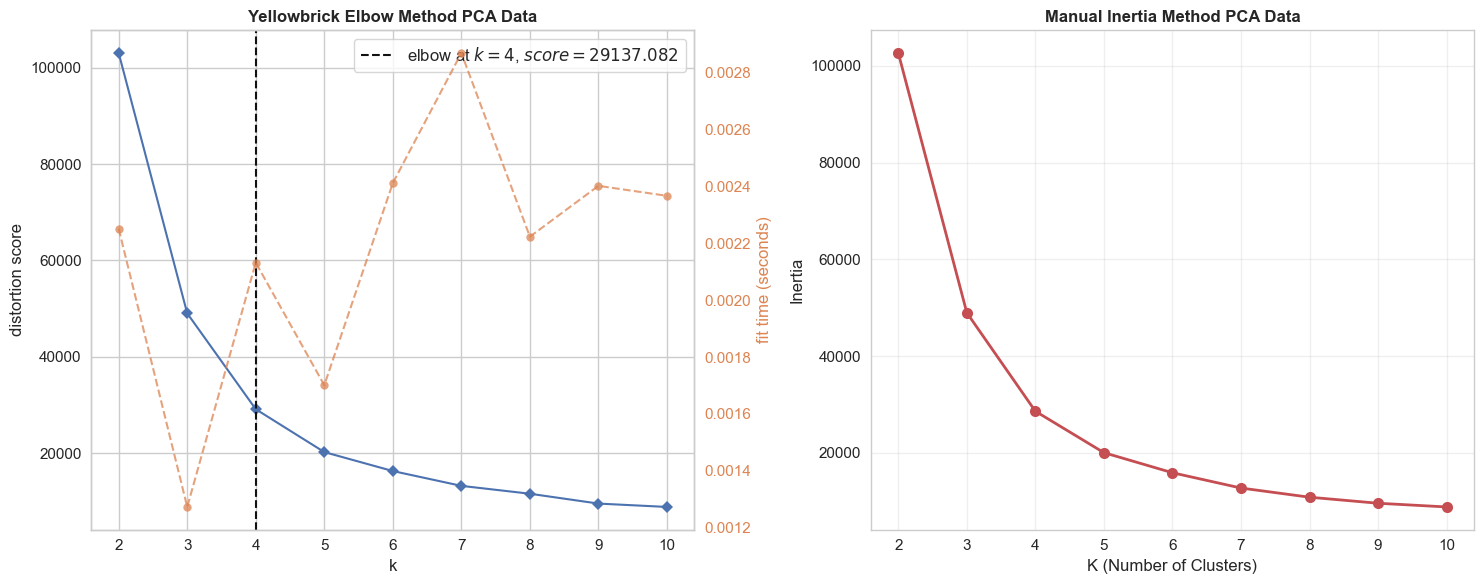

Optimal K untuk PCA Data: 4


In [1487]:
# Elbow Method untuk PCA data
def elbow_analysis(data, title_suffix="", k_range=(2, 11), figsize=(15, 6)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Yellowbrick Elbow
    model = KMeans(random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, metric='distortion', ax=ax1)
    visualizer.fit(data)
    visualizer.finalize()
    ax1.set_title(f'Yellowbrick Elbow Method {title_suffix}', fontweight='bold')
    
    # Manual Inertia
    print(f'Inertia Analysis {title_suffix}')
    k_values = range(k_range[0], k_range[1])
    inertias = []
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        print(f'K = {k}: Inertia = {kmeans.inertia_:.2f}')
    
    # Plot manual inertia
    ax2.plot(k_values, inertias, 'ro-', linewidth=2, markersize=8)
    ax2.set_title(f'Manual Inertia Method {title_suffix}', fontweight='bold')
    ax2.set_xlabel('K (Number of Clusters)')
    ax2.set_ylabel('Inertia')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f'Optimal K untuk {title_suffix}: {visualizer.elbow_value_}')
    return visualizer.elbow_value_, inertias

# Jalankan Elbow Method untuk PCA data
optimal_k_pca, inertias_pca = elbow_analysis(pca_data, 'PCA Data')

- Nah kalau di Model Kmeans dengan PCA ini ternyata elbow nya ada di 4 nih gengs menarik juga dengan score 28881 keren juga kaya nomer cantik yang selalu di buru oleh bapak saya.

### Melatih Model Kmeans Dengan PCA

In [1488]:
# Inisialiasi model kmenas 
kmeans_pca = KMeans(n_clusters=4, n_init=10, random_state=42)

# Melatih Model
pca_cluster_labels = kmeans_pca.fit_predict(pca_data)

# Menambahkan label ke dataframe pca
clustering_df_pca = clustering_df.copy()
clustering_df_pca['PCA_Cluster'] = pca_cluster_labels

### Evaluasi Model Kmeans With PCA

In [1489]:
# Evaluasi untuk clustering dengan PCA
results_pca = evaluasi_clustering(clustering_df_pca.drop('Cluster', axis=1), pca_cluster_labels, 'Kmeans Clustering with PCA')

# Gabungkan dengan results_df yang sudah ada
results_df = pd.concat([results_df, pd.DataFrame([results_pca])], ignore_index=True)
results_df.head()

,Model,N Cluster,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
0,Kmeans - Clustering,3,0.515333,7694.848513,0.607411
1,Kmeans Clustering with PCA,4,0.485987,8658.447199,0.648435


- Bisa kita lihat ternyata mengejutkan sekali PCA kalah telak dengan Kmeans biasa why ini why ada apa, mungkin akunya aja yang salah, tapi gak papa lah ya untuk pembelajaran kalau ada yang tau tolong kasih tau kenapa Kmeans tanpa PCA lebih bagus daripada dengan PCA.

### Menyimpan model KMeans With PCA

In [1490]:
joblib.dump(clustering_df_pca, 'kmeans_clustering_pca.h5')

['kmeans_clustering_pca.h5']

# **6. Interpretasi Hasil Clustering**

In [1491]:
def create_cluster_summary(df, cluster_col='Cluster', exclude_cols=None):
    """
    Membuat ringkasan statistik untuk setiap cluster
    """
    import pandas as pd
    
    # Tentukan kolom yang akan dikecualikan
    if exclude_cols is None:
        exclude_cols = []
    
    # Tambahkan kolom cluster ke daftar exclude
    exclude_cols.append(cluster_col)
    
    # Dapatkan semua kolom numerik
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Hapus kolom yang dikecualikan
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    # Buat dictionary untuk agregasi
    agg_dict = {}
    for col in numeric_cols:
        agg_dict[col] = ['count', 'mean', 'median', 'std', 'min', 'max']
    
    # Lakukan groupby dan agregasi
    summary = df.groupby(cluster_col).agg(agg_dict).reset_index()
    
    # Flatten column names
    new_columns = [cluster_col]
    for col in numeric_cols:
        for stat in ['count', 'mean', 'median', 'std', 'min', 'max']:
            new_columns.append(f"{col}_{stat}")
    
    summary.columns = new_columns
    
    # Round untuk hasil yang lebih rapi
    summary = summary.round(3)
    
    return summary

In [1492]:
summary_cluster = create_cluster_summary(clustering_df)
summary_cluster

,Cluster,TransactionAmount_count,TransactionAmount_mean,TransactionAmount_median,TransactionAmount_std,TransactionAmount_min,TransactionAmount_max,TransactionType_count,TransactionType_mean,TransactionType_median,...,AccountBalance_median,AccountBalance_std,AccountBalance_min,AccountBalance_max,AgeGroup_count,AgeGroup_mean,AgeGroup_median,AgeGroup_std,AgeGroup_min,AgeGroup_max
0,0,896,0.006,-0.049,0.993,-1.607,2.165,896,0.772,1.0,...,0.310,0.260,0.001,0.994,896,1.768,2.0,1.126,0,3
1,1,761,0.011,-0.075,1.014,-1.595,2.196,761,0.760,1.0,...,0.307,0.265,0.000,1.000,761,1.675,1.0,1.116,0,3
2,2,856,-0.016,-0.046,0.996,-1.606,2.179,856,0.796,1.0,...,0.326,0.258,0.001,0.998,856,1.687,2.0,1.112,0,3



```
Cluster 0
```
- Rata rata nominal transaksi di cluster ini sangat kecil (**0.007**), namun standar deviasi cukup tinggi (**1.014**), menunjukkan variasi nilai transaksi yang besar. Nilai minimum transaksi (**-1.595**) dan maksimum (**2.196**) memperkuat adanya rentang transaksi yang lebar.
- Rata rata tipe transaksi (**0.766**) dan median (**1.00**) mengindikasikan dominasi satu jenis transaksi pada cluster ini.
- Median saldo akun (**0.304**) dengan standar deviasi (**0.264**) menunjukkan sebagian besar anggota memiliki saldo rendah hingga sedang, dengan saldo minimum (**0.000**) dan maksimum (**1.000**).
- Rata rata kelompok usia (**1.672**) dengan median (**1.0**) dan standar deviasi (**1.119**) menunjukkan distribusi usia yang cukup tersebar, namun cenderung didominasi kelompok usia lebih muda.

```
Cluster 1
```
- Rata rata nominal transaksi di cluster ini adalah **-0.012**, dengan standar deviasi **0.995**, menunjukkan variasi nilai transaksi yang besar. Nilai minimum transaksi (**-1.606**) dan maksimum (**2.179**) memperlihatkan rentang transaksi yang lebar.
- Rata rata tipe transaksi (**0.794**) dan median (**1.00**) mengindikasikan dominasi satu jenis transaksi pada cluster ini.
- Median saldo akun (**0.326**) dengan standar deviasi (**0.258**) menunjukkan sebagian besar anggota memiliki saldo rendah hingga sedang, dengan saldo minimum (**0.001**) dan maksimum (**0.998**).
- Rata rata kelompok usia (**1.686**) dengan median (**2.0**) dan standar deviasi (**1.109**) menunjukkan distribusi usia yang cukup tersebar, namun cenderung didominasi kelompok usia lebih dewasa.

```
Cluster 2
```
- Rata rata nominal transaksi di cluster ini adalah **0.003**, dengan standar deviasi **0.994**, menunjukkan variasi nilai transaksi yang besar. Nilai minimum transaksi (**-1.607**) dan maksimum (**2.165**) memperlihatkan rentang transaksi yang lebar.
- Rata rata tipe transaksi (**0.773**) dan median (**1.00**) mengindikasikan dominasi satu jenis transaksi pada cluster ini.
- Median saldo akun (**0.311**) dengan standar deviasi (**0.261**) menunjukkan sebagian besar anggota memiliki saldo rendah hingga sedang, dengan saldo minimum (**0.001**) dan maksimum (**0.994**).
- Rata rata kelompok usia (**1.769**) dengan median (**2.0**) dan standar deviasi (**1.124**) menunjukkan distribusi usia yang cukup tersebar, namun cenderung didominasi kelompok usia lebih dewasa.


> Catatan

- Disini aku hanya menjelaskan statistik saja karena kalau sama deep banget aku terlalu bingung untuk menerjamaahkan dataset yang sudah di scaling dan juga encoding, maka dari itu aku bakal inverse dataset ini.

# **7. Mengeksport Data**

In [1493]:
# Memastikan Fitur Clustering di ubah menjadi target
clustering_df = clustering_df.rename(columns={'Cluster': 'Target'})

# Menampilkan Hasil
clustering_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,-1.472586,1.0,36,0.0,0.838710,0.0,0.244828,0.0,0.336832,2,1
1,0.670976,1.0,15,0.0,0.806452,0.0,0.451724,0.0,0.918055,2,0
2,-0.565951,1.0,23,2.0,0.016129,3.0,0.158621,0.0,0.068637,0,0
3,-0.198913,1.0,33,2.0,0.129032,3.0,0.051724,0.0,0.569198,1,1
4,-1.478669,0.0,1,2.0,0.435484,3.0,0.648276,0.0,0.492591,3,2


In [1494]:
# Mendownload hasil clustering
clustering_df.to_csv('data_clustering.csv', index=False)

# **8. Inverse Dataset**

In [1495]:
inverse_df = clustering_df.copy()

# Memfilter fitur numerik dan kategorikal
num_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
cat_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'AgeGroup']

## Inverse Fitur Numeric

In [1496]:
# Mengembalikan TransactionAmount ke bentuk MinMaxScaler
inverse_df['TransactionAmount'] = pt.inverse_transform(inverse_df[['TransactionAmount']]).flatten()

# Mengembalikan nilai MinMax kepada nilai aslinya
inverse_df[num_features] = scaler.inverse_transform(inverse_df[num_features])

# Menampilkan Hasilnya
inverse_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,1.0,36,0.0,70.0,0.0,81.0,1.0,5112.21,2,1
1,376.24,1.0,15,0.0,68.0,0.0,141.0,1.0,13758.91,2,0
2,126.29,1.0,23,2.0,19.0,3.0,56.0,1.0,1122.35,0,0
3,184.50,1.0,33,2.0,26.0,3.0,25.0,1.0,8569.06,1,1
4,13.45,0.0,1,2.0,45.0,3.0,198.0,1.0,7429.40,3,2


- Fitur Numeric Sudah bagus sekarang tinggal Fitur Kategorikal.

## Inverse Fitur Kategotikal

In [1497]:
for feature in cat_features:
    if feature in encoder:
        inverse_df[feature] = encoder[feature].inverse_transform(inverse_df[feature].astype(int))

# Menampilkan hasil akhir
inverse_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Lansia,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Lansia,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Anak Muda,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Golden Age,1
4,13.45,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,Orang Tua,2


In [1498]:
# Mengecek apakah ada data yang kosong dan duplikasi setelah inverse
print(f'Data setelah inversi memiliki Missing Values : {inverse_df.isnull().sum().sum()}')
print(f'Data setelah inversi memiliki duplikasi : {inverse_df.duplicated().sum()}')

Data setelah inversi memiliki Missing Values : 30
Data setelah inversi memiliki duplikasi : 0


- Eh Kok ada yang missing ini kenapa ya, gak tau deh udah cape kita pake median aja lah daripada di hapus terus.

In [1499]:
# Mengatasi nilai yang kosong menggunakan imputasi medain
inverse_df['Location'] = inverse_df['Location'].fillna(inverse_df['Location'].mode()[0])
print(f'Jumlah missing values di Location setelah imputasi: {inverse_df["Location"].isnull().sum()}')

Jumlah missing values di Location setelah imputasi: 0


- Okey semuanya sudah aman kita tinggal melakukan interpretasi hasil clustering

## Interpretasi Hasil Clustering dengan Data Inverse

In [1500]:
summary_df = inverse_df.groupby('Target').agg({
    'Channel': lambda x: x.mode().iloc[0],
    'CustomerOccupation': lambda x: x.mode().iloc[0],
    'AgeGroup': lambda x: x.mode().iloc[0],
    'TransactionAmount': ['mean', 'median', 'min', 'max', 'std', 'count'],
    'CustomerAge': ['mean', 'median', 'min', 'max', 'std'],
    'AccountBalance': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

# Menampilkannya
summary_df.columns = [
    "_".join(col).replace("_<lambda>", "").rstrip("_") if isinstance(col, tuple) else col
    for col in summary_df.columns.values
]

# Menyiapkan DataFrame final presentasi
presentation_df = pd.DataFrame(columns=[
    'Cluster', 'Channel Dominan', 'Profesi Dominan', 'Kelompok Usia Dominan',
    'Avg Transaksi', 'Min Transaksi', 'Max Transaksi', 'Std Transaksi', 'Jumlah Data',
    'Avg Usia', 'Min Usia', 'Max Usia', 'Std Usia',
    'Avg Saldo', 'Min Saldo', 'Max Saldo', 'Std Saldo'
])

# Ngedit Sikit lah, masukan nilai nilainya
for _, row in summary_df.iterrows():
    presentation_df = pd.concat([presentation_df, pd.DataFrame([{
        'Cluster': row['Target'],
        'Channel Dominan': row['Channel'],
        'Profesi Dominan': row['CustomerOccupation'],
        'Kelompok Usia Dominan': row['AgeGroup'],
        'Avg Transaksi': f"${row['TransactionAmount_mean']:,.2f}",
        'Min Transaksi': f"${row['TransactionAmount_min']:,.2f}",
        'Max Transaksi': f"${row['TransactionAmount_max']:,.2f}",
        'Std Transaksi': f"${row['TransactionAmount_std']:,.2f}",
        'Jumlah Data': int(row['TransactionAmount_count']),

        'Avg Usia': f"{math.floor(row['CustomerAge_mean'])} tahun",
        'Min Usia': f"{int(row['CustomerAge_min'])} tahun",
        'Max Usia': f"{int(row['CustomerAge_max'])} tahun",
        'Std Usia': f"{row['CustomerAge_std']:.2f}",

        'Avg Saldo': f"${row['AccountBalance_mean']:,.2f}",
        'Min Saldo': f"${row['AccountBalance_min']:,.2f}",
        'Max Saldo': f"${row['AccountBalance_max']:,.2f}",
        'Std Saldo': f"${row['AccountBalance_std']:,.2f}",
    }])], ignore_index=True)

# Menampilkan hasil presentasi
presentation_df

,Cluster,Channel Dominan,Profesi Dominan,Kelompok Usia Dominan,Avg Transaksi,Min Transaksi,Max Transaksi,Std Transaksi,Jumlah Data,Avg Usia,Min Usia,Max Usia,Std Usia,Avg Saldo,Min Saldo,Max Saldo,Std Saldo
0,0,Branch,Engineer,Orang Tua,$295.55,$0.26,"$1,762.28",$283.94,896,45 tahun,18 tahun,80 tahun,17.48,"$5,053.67",$112.76,"$14,881.77","$3,866.92"
1,1,Branch,Student,Golden Age,$304.82,$1.41,"$1,919.11",$306.91,761,43 tahun,18 tahun,80 tahun,17.55,"$5,132.96",$101.25,"$14,977.99","$3,944.95"
2,2,Branch,Student,Orang Tua,$291.56,$0.32,"$1,831.02",$284.50,856,44 tahun,18 tahun,80 tahun,18.17,"$5,161.02",$117.98,"$14,942.78","$3,833.30"


```
Cluster 0
```
- Di cluster ini, mayoritas nasabah adalah **Engineer** yang sudah masuk Kelompok Usia **Orang Tua**. Mereka paling suka datang langsung ke **Branch** atau ke cabang, mungkin karena lebih nyaman urusan tatap muka dan intinya emang orang tua mah gak suka ribet. 
- Dengan saldo rata rata ada di angka \$5,053.67 mereka kelihatan sudah mapan dan keuangannya stabil. Transaksi mereka juga cenderung rutin, nggak terlalu ekstrem. Intinya, cluster ini cocok buat segmen nasabah yang sudah settle, suka layanan konvensional, dan butuh rasa aman dalam bertransaksi.

```
Cluster 1
```
- Cluster satu ini didominasi oleh **Student**, tapi usianya sudah masuk **Golden Age**. Mereka juga paling suka ke **Branch**, tapi gaya hidupnya lebih aktif terlihat dari rata rata transaksi yang paling tinggi di antara semua cluster. Saldo mereka juga stabil. Bisa jadi mereka ini mahasiswa profesi atau orang orang yang lagi upgrade skill di usia emas. Cluster ini cocok banget buat ditawarin produk produk premium atau program loyalitas yang mendukung pengembangan diri.

```
Cluster 2
```
- Mirip dengan cluster 0 dan juga 1, cluster ini juga suka ke **Branch**, tapi profesi dominannya **Student** dan Kelompok Usianya **Orang Tua**. Mahasiswa abadi kah, donatur kampuskah hahah engga engga bercanda. Artinya, banyak dari mereka yang mungkin sedang lanjut studi atau kuliah sambil kerja. Transaksinya paling rendah tapi saldo nya palig tinggi keren juga. Cluster ini cocok buat program yang mendukung pengembangan diri atau layanan keuangan yang bisa menyesuaikan kebutuhan mereka.

In [1501]:
inverse_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Lansia,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Lansia,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Anak Muda,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Golden Age,1
4,13.45,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,Orang Tua,2


- Semuanya aman tinggal kita lakukan pendownloadan.

## Menyimpan Data Hasil Inverse

In [1502]:
inverse_df.to_csv('data_clustering_inverse.csv', index=False)